# *VIDEO GAME SALES - ANÁLISE EXPLORATÓRIA E ORIENTADA A NEGÓCIOS*

# Objetivo
Este notebook apresenta um estudo estatístico e estratégico do mercado de videogames utilizando o dataset Video Game Sales. A análise simula o fluxo de trabalho de um Analista de Dados, estruturado em três etapas principais:
    1. Exploração e Higienização: Auditoria inicial do dataset para garantir a integridade dos dados e realizar ajustes necessários para a análise.

    2. Análise Descritiva: Aplicação de estatística aplicada (Análise de Frequência, Medidas de Tendência Central e Dispersão) para traçar o perfil histórico da indústria e compreender o comportamento das vendas.

    3. Inteligência de Mercado: Uma imersão em pontos-chave orientados a negócios, buscando extrair insights sobre eficiência de plataformas, barreiras de entrada e concentração de sucesso.

Este estudo não visa estabelecer conclusões definitivas sobre o mercado atual, mas sim demonstrar como a aplicação de técnicas analíticas pode transformar dados brutos em inteligência competitiva e valor estratégico.

Limitações do Estudo

Para a interpretação correta dos resultados, é importante considerar as seguintes limitações do dataset:

    Recorte Temporal: Os dados compreendem lançamentos até o ano de 2016, portanto, refletem o comportamento de gerações passadas (como PS3, Xbox 360 e Wii) e o início da oitava geração.

    Escopo de Vendas: O foco está em vendas físicas e grandes lançamentos, podendo não capturar a totalidade do mercado digital e de jogos indie que ganharam força nos anos finais do dataset.

    Consistência de Dados: Eventuais registros ausentes ou incompletos em anos específicos foram tratados para minimizar distorções, mas são inerentes à natureza histórica da fonte de dados.

# Descrição Geral do Dataset (obtido do Kaggle)

Este conjunto de dados contém informações sobre as vendas de video games em diferentes plataformas, gêneros e regiões, sendo extremamente valioso para diversas análises estatísticas e casos de uso em negócios.

Colunas:

    Rank – Ranking de vendas globais.

    Name – Nome do jogo.

    Platform – Plataforma de lançamento do jogo (ex: PC, PS4, Xbox).

    Year – Ano de lançamento do jogo.

    Genre – Gênero do jogo.

    Publisher – Empresa publicadora (editora) do jogo.

    NA_Sales – Vendas na América do Norte (em milhões de unidades).

    EU_Sales – Vendas na Europa (em milhões de unidades).

    JP_Sales – Vendas no Japão (em milhões de unidades).

    Other_Sales – Vendas no restante do mundo (em milhões de unidades).

    Global_Sales – Total de vendas mundiais acumuladas.

Todos os dados foram obtidos a partir do website vgchartz.com.

# IMPORTANDO BIBLIOTECAS E CARREGANDO DADOS

In [74]:
import pandas as pd # Pandas and numpy for Data Manipulation & Analysis
import numpy as np
from math import pi
import matplotlib.pyplot as plt # Matplotlib, Seaborn and Plotly for Data Visualization
from matplotlib.animation import FuncAnimation
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import kagglehub
from kagglehub import KaggleDatasetAdapter # Kagglehub for data acquisition and retrieval
from IPython.display import HTML

file_path = "vgsales.csv"

df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "anandshaw2001/video-game-sales",
  file_path
)

# VISÃO GERAL DO DATASET

In [75]:
df.columns = df.columns.str.lower() # Standardizing column names and handling datetime features
df['year'] = pd.to_datetime(df['year'], format='%Y')
df['year'] = df['year'].dt.year
df = df[df['year'] <= 2016] # Due to the scarcity of data for 2017 and beyond, the analysis will be limited to records up to 2016

df

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [76]:
df.describe()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16323.000000,16323.000000,16323.000000,16323.000000,16323.000000,16323.000000,16323.000000
mean,8291.651167,2006.403664,0.265463,0.147591,0.078677,0.048336,0.540343
std,4792.155748,5.826954,0.821684,0.508823,0.311593,0.189907,1.565906
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4135.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8294.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2016.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [77]:
print(df.shape) # Number of lines and columns
print(f"\nTipos dos dados:\n{df.dtypes}") # Checking data types
print(f"\nO dataset vai de {int(df['year'].min())} até {int(df['year'].max())}")



(16323, 11)

Tipos dos dados:
rank              int64
name             object
platform         object
year            float64
genre            object
publisher        object
na_sales        float64
eu_sales        float64
jp_sales        float64
other_sales     float64
global_sales    float64
dtype: object

O dataset vai de 1980 até 2016


In [78]:
df[df.duplicated()] # Checking for duplicated values

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales


In [79]:
print(f"\nValores inválidos por cluna:\n{df.isna().sum()}") # Checking missing values by column
print(f"\nNúmero de células NA: {df.isna().sum().sum()}")
print(f"Porcentagem de células que faltam: {round(df.isna().sum().sum() / df.size * 100, 3)}")


Valores inválidos por cluna:
rank             0
name             0
platform         0
year             0
genre            0
publisher       36
na_sales         0
eu_sales         0
jp_sales         0
other_sales      0
global_sales     0
dtype: int64

Número de células NA: 36
Porcentagem de células que faltam: 0.02


In [80]:
df.describe(include="all")

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16323.000000,16323,16323,16323.000000,16323,16287,16323.000000,16323.000000,16323.000000,16323.000000,16323.000000
unique,NaN,11357,31,NaN,12,576,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2132,NaN,3252,1339,NaN,NaN,NaN,NaN,NaN
mean,8291.651167,NaN,NaN,2006.403664,NaN,NaN,0.265463,0.147591,0.078677,0.048336,0.540343
std,4792.155748,NaN,NaN,5.826954,NaN,NaN,0.821684,0.508823,0.311593,0.189907,1.565906
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4135.500000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8294.000000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.480000


# ANÁLISE DESCRITIVA
Nesta etapa, aplicaremos técnicas de estatística descritiva para explorar e compreender a estrutura dos dados. O objetivo é identificar padrões, tendências e a distribuição das vendas através de tabelas de frequência, medidas estatísticas e visualizações gráficas.

Classificação das Variáveis e Metodologia

Para uma análise precisa, os dados serão tratados conforme sua natureza:

    Variáveis Quantitativas (Numéricas): Compreendem os valores de vendas em milhões de unidades (global_sales, na_sales, etc.) e variáveis discretas como rank e year. Para estas, utilizaremos Histogramas para observar a assimetria da distribuição.

    Variáveis Qualitativas (Categóricas): Representam atributos como platform, genre e publisher. Para estas, utilizaremos Tabelas de Frequência e Gráficos de Barras, permitindo identificar os segmentos com maior presença de mercado.

Abaixo, realizaremos a exploração individual dessas variáveis, combinando a extração de frequências com sua respectiva representação visual. Ao final desta seção, apresentaremos uma breve interpretação dos dados observados, consolidando os principais achados desta análise.

## FREQUÊNCIA

### QUANTITATIVAS

In [81]:
num_cols = df.select_dtypes(include="float64").columns
cat_cols = df.select_dtypes(include="object").columns

df[num_cols].describe()

,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16323.000000,16323.000000,16323.000000,16323.000000,16323.000000,16323.000000
mean,2006.403664,0.265463,0.147591,0.078677,0.048336,0.540343
std,5.826954,0.821684,0.508823,0.311593,0.189907,1.565906
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2016.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [82]:

freq_table = pd.DataFrame({
    'freq_abs' : df['year'].value_counts(),
    'freq_rel' : df['year'].value_counts(normalize=True) * 100
}).sort_index(ascending=False).reset_index()

freq_table

,year,freq_abs,freq_rel
0,2016.0,344,2.107456
1,2015.0,614,3.761563
2,2014.0,582,3.565521
3,2013.0,546,3.344973
4,2012.0,657,4.024995
5,2011.0,1139,6.977884
6,2010.0,1259,7.713043
7,2009.0,1431,8.766771
8,2008.0,1428,8.748392
9,2007.0,1202,7.363842


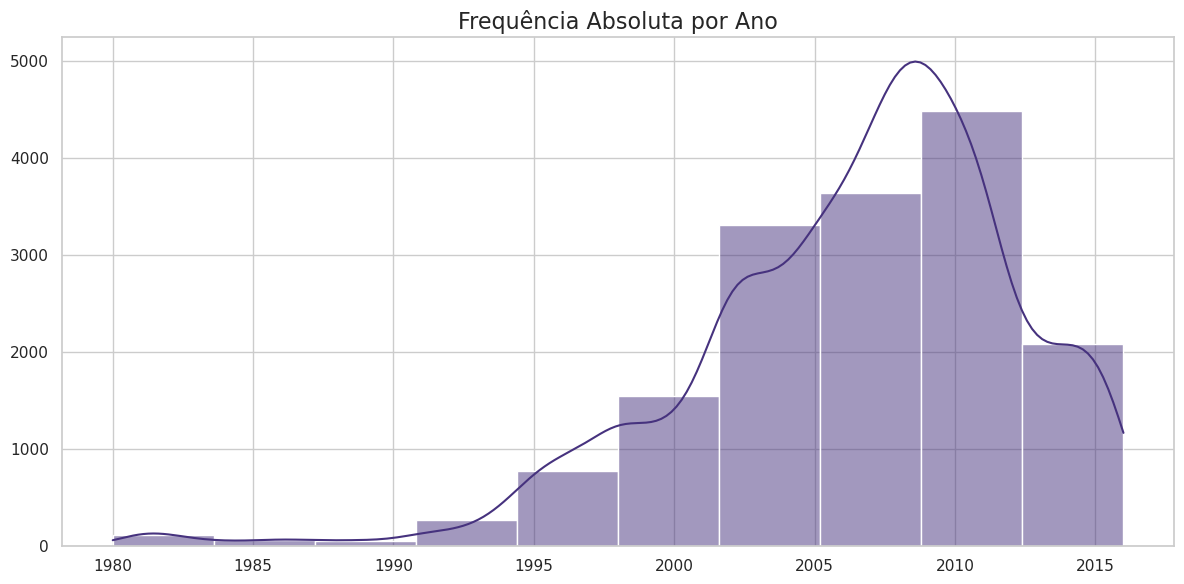

In [83]:
plt.figure(figsize=(12,6), dpi=100)

sns.set_theme(style="whitegrid", palette="viridis")
sns.histplot(df['year'], kde=True, bins=10)

plt.ylabel("")
plt.xlabel("")
plt.title('Frequência Absoluta por Ano', fontsize=16)


plt.tight_layout()
plt.show()

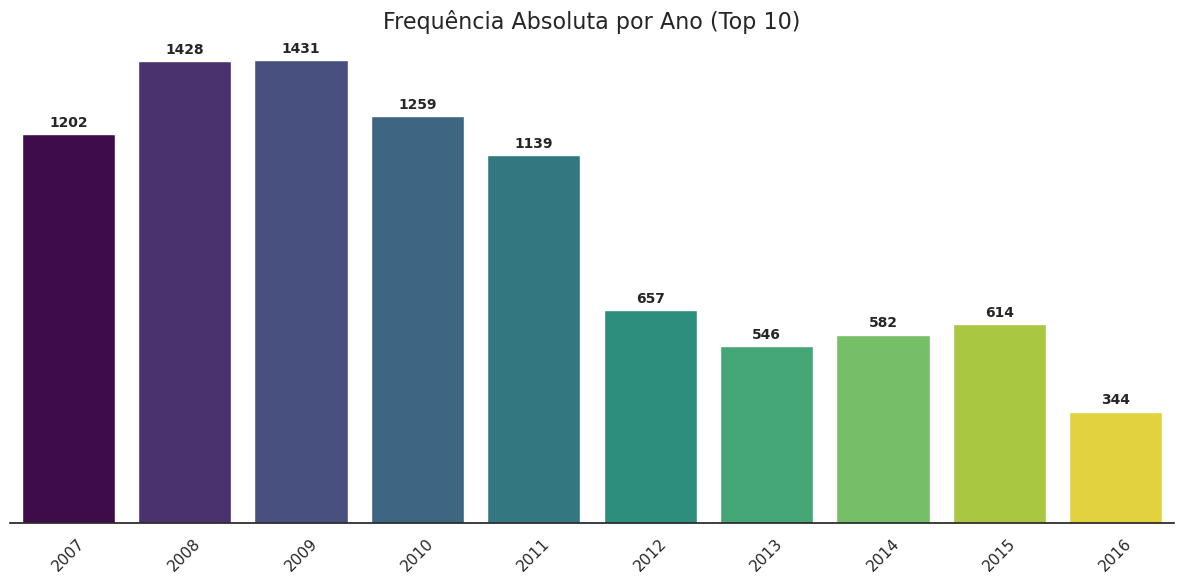

In [84]:
top10 = freq_table['year'].iloc[:10].tolist()

plt.figure(figsize=(12, 6))
freq_table['year'] = freq_table['year'].astype(int)

sns.set_theme(style="white")

ax = sns.barplot(data=freq_table.loc[freq_table.year.isin(top10)],
            x='year',
            y='freq_abs',
            palette='viridis',
            hue='year',
            legend=False
            )

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

sns.despine(left=True)

ax.set_yticks([])
ax.set_ylabel('')
ax.set_xlabel('')

plt.title('Frequência Absoluta por Ano (Top 10)', fontsize=16)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

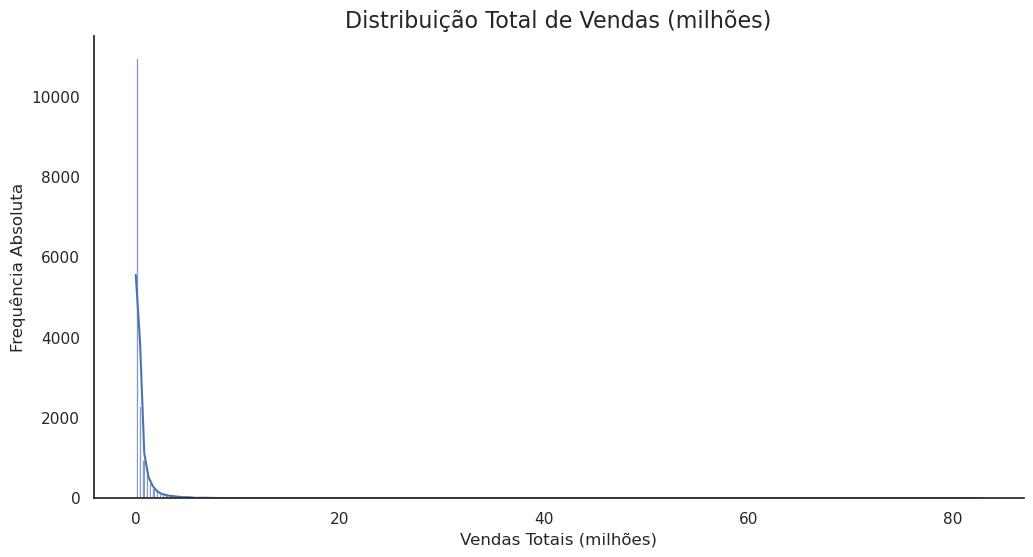

In [85]:
plt.figure(figsize=(12, 6))

sns.set_theme(style='white')

ax = sns.histplot(
    data=df['global_sales'],
    kde=True,
    edgecolor='white',
    linewidth=1.2,
    alpha=0.7)

sns.despine()

plt.title('Distribuição Total de Vendas (milhões)', fontsize=16)
plt.xlabel('Vendas Totais (milhões)', fontsize=12)
plt.ylabel('Frequência Absoluta', fontsize=12)

plt.show()

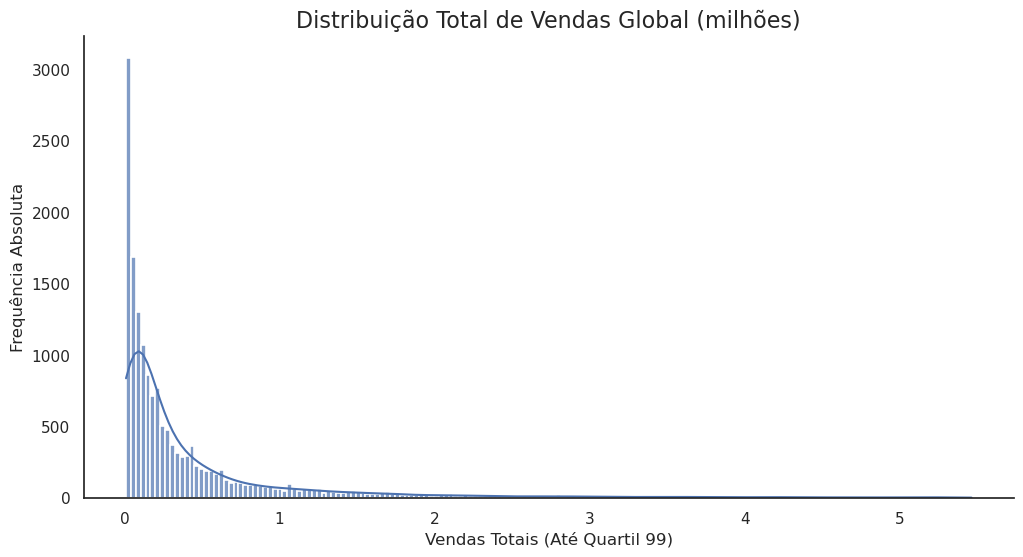

In [86]:
q99_total = df["global_sales"].quantile(0.99) # Analyzing the 99th Percentile

plt.figure(figsize=(12, 6))

ax = sns.histplot(
    data=df[df["global_sales"] <= q99_total]["global_sales"],
    kde=True,
    edgecolor='white',
    linewidth=1.2,
    alpha=0.7)

sns.despine()

plt.title('Distribuição Total de Vendas Global (milhões)', fontsize=16)
plt.xlabel('Vendas Totais (Até Quartil 99)', fontsize=12)
plt.ylabel('Frequência Absoluta', fontsize=12)

plt.show()


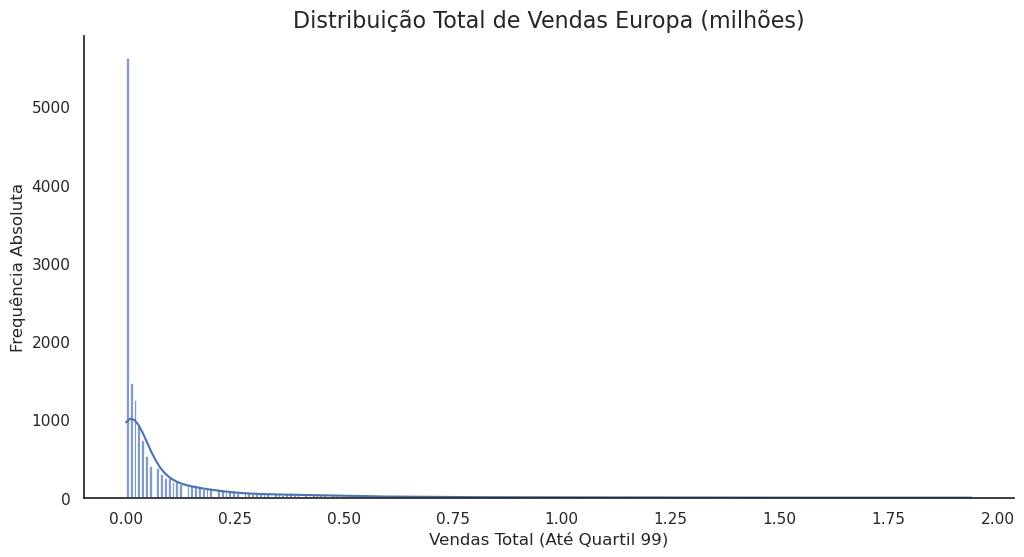

In [87]:
q99_eu = df["eu_sales"].quantile(0.99)

plt.figure(figsize=(12, 6))

ax = sns.histplot(
    data=df[df["eu_sales"] <= q99_eu]["eu_sales"],
    kde=True,
    edgecolor='white',
    linewidth=1.2,
    alpha=0.7)

sns.despine()

plt.title('Distribuição Total de Vendas Europa (milhões)', fontsize=16)
plt.xlabel('Vendas Total (Até Quartil 99)', fontsize=12)
plt.ylabel('Frequência Absoluta', fontsize=12)

plt.show()

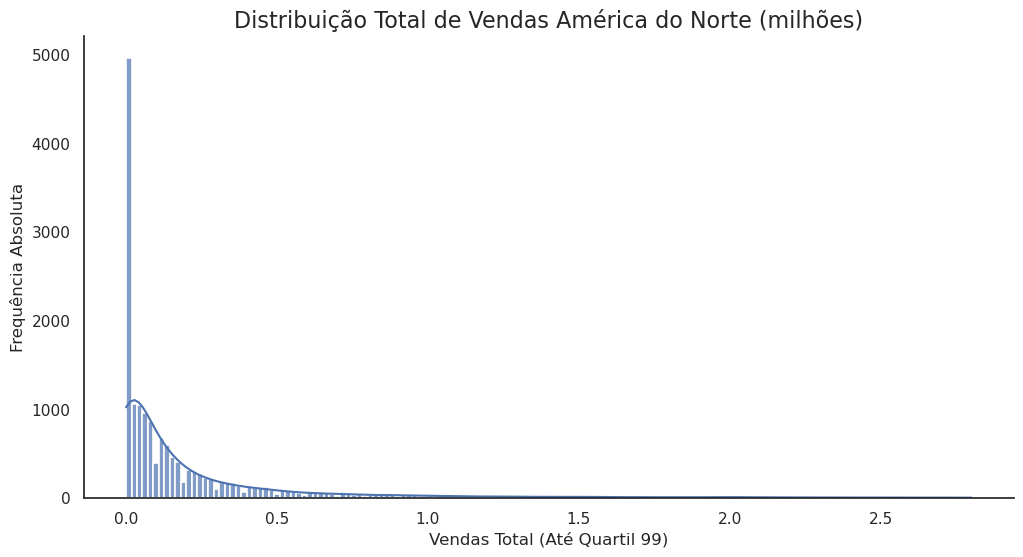

In [88]:
q99_na = df["na_sales"].quantile(0.99)

plt.figure(figsize=(12, 6))

ax = sns.histplot(
    data=df[df["na_sales"] <= q99_na]["na_sales"],
    kde=True,
    edgecolor='white',
    linewidth=1.2,
    alpha=0.7)

sns.despine()

plt.title('Distribuição Total de Vendas América do Norte (milhões)', fontsize=16)
plt.xlabel('Vendas Total (Até Quartil 99)', fontsize=12)
plt.ylabel('Frequência Absoluta', fontsize=12)

plt.show()

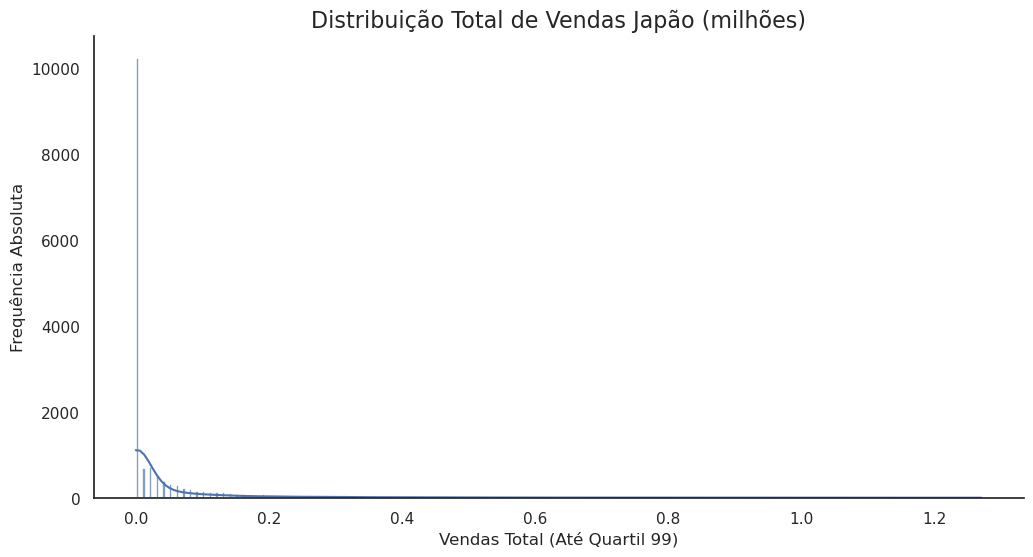

In [89]:
q99_jp = df["jp_sales"].quantile(0.99)

plt.figure(figsize=(12, 6))

ax = sns.histplot(
    data=df[df["jp_sales"] <= q99_jp]["jp_sales"],
    kde=True,
    edgecolor='white',
    linewidth=1.2,
    alpha=0.7)

sns.despine()

plt.title('Distribuição Total de Vendas Japão (milhões)', fontsize=16)
plt.xlabel('Vendas Total (Até Quartil 99)', fontsize=12)
plt.ylabel('Frequência Absoluta', fontsize=12)

plt.show()

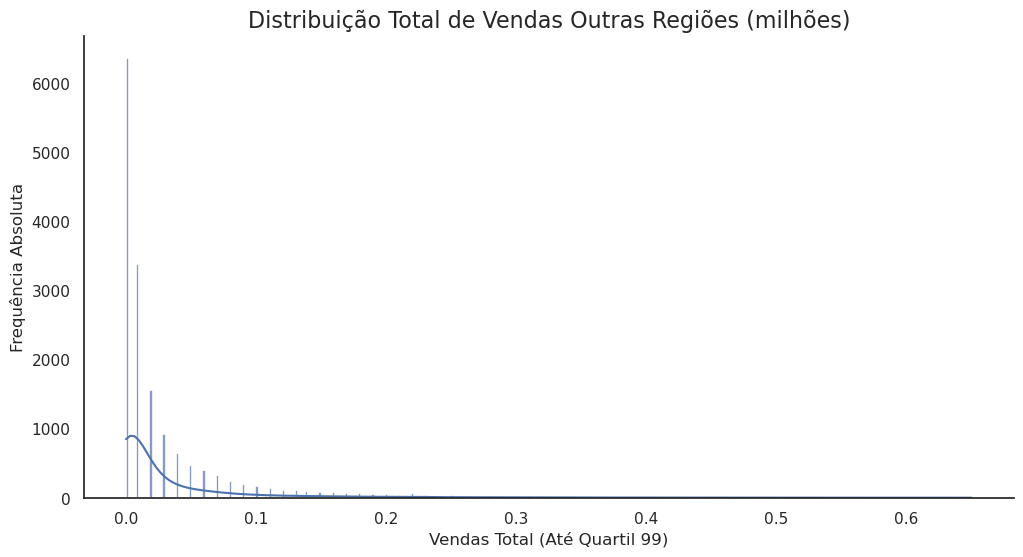

In [90]:
q99_other = df["other_sales"].quantile(0.99)

plt.figure(figsize=(12, 6))

ax = sns.histplot(
    data=df[df["other_sales"] <= q99_other]["other_sales"],
    kde=True,
    edgecolor='white',
    linewidth=1.2,
    alpha=0.7)

sns.despine()

plt.title('Distribuição Total de Vendas Outras Regiões (milhões)', fontsize=16)
plt.xlabel('Vendas Total (Até Quartil 99)', fontsize=12)
plt.ylabel('Frequência Absoluta', fontsize=12)

plt.show()

A análise das distribuições regionais de vendas revela um padrão consistentemente assimétrico à direita, com forte presença de outliers em todas as regiões analisadas. Esse comportamento indica um mercado altamente concentrado, no qual a maioria dos títulos apresenta vendas relativamente modestas, enquanto poucos jogos concentram volumes expressivos. Além disso, a série temporal de lançamentos evidencia um aumento pronunciado entre 2008 e 2010.

### QUALITATIVAS

In [91]:
freq_names = pd.DataFrame({
    "freq_abs":df['name'].value_counts()
}).reset_index().sort_values(by=['freq_abs'], ascending=False)

freq_names

,name,freq_abs
0,Need for Speed: Most Wanted,12
1,FIFA 14,9
2,LEGO Marvel Super Heroes,9
3,Ratatouille,9
4,FIFA Soccer 13,8
...,...,...
11352,Wii Play,1
11353,New Super Mario Bros.,1
11354,Pokemon Red/Pokemon Blue,1
11355,Wii Sports Resort,1


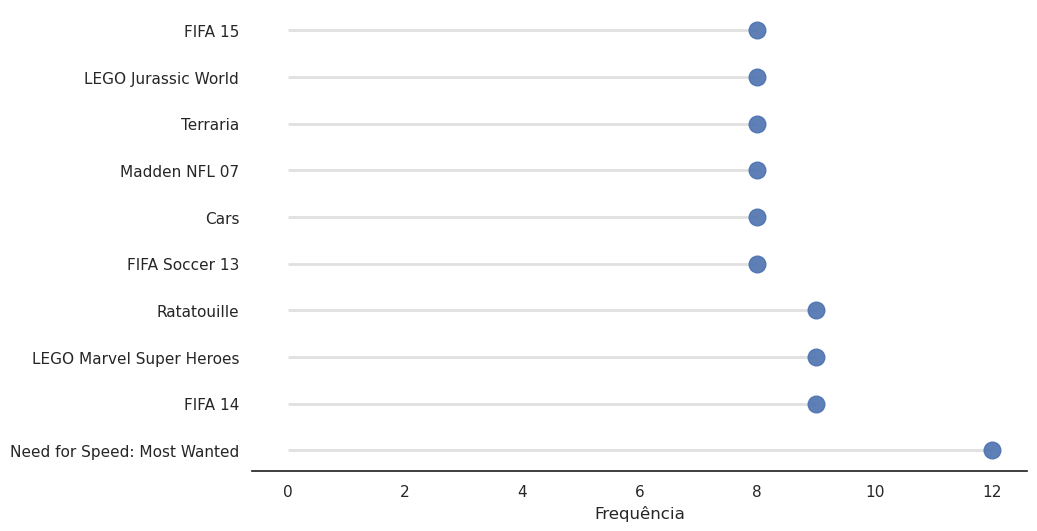

In [92]:
top10_names = freq_names[:10]
my_range=range(len(top10_names.index))

plt.figure(figsize=(10, 6))
ax = plt.gca()

plt.hlines(y=top10_names["name"], xmin=0, xmax=top10_names['freq_abs'], color='lightgray', linewidth=2, alpha=0.7)

plt.plot(top10_names['freq_abs'], my_range, "o", markersize=12, alpha=0.9)

sns.despine(left=True, bottom=False)

plt.yticks(my_range, top10_names['name'])
plt.xlabel('Frequência')
plt.ylabel('')

plt.show()

In [93]:
print(df['platform'].unique()) # Available Platforms

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


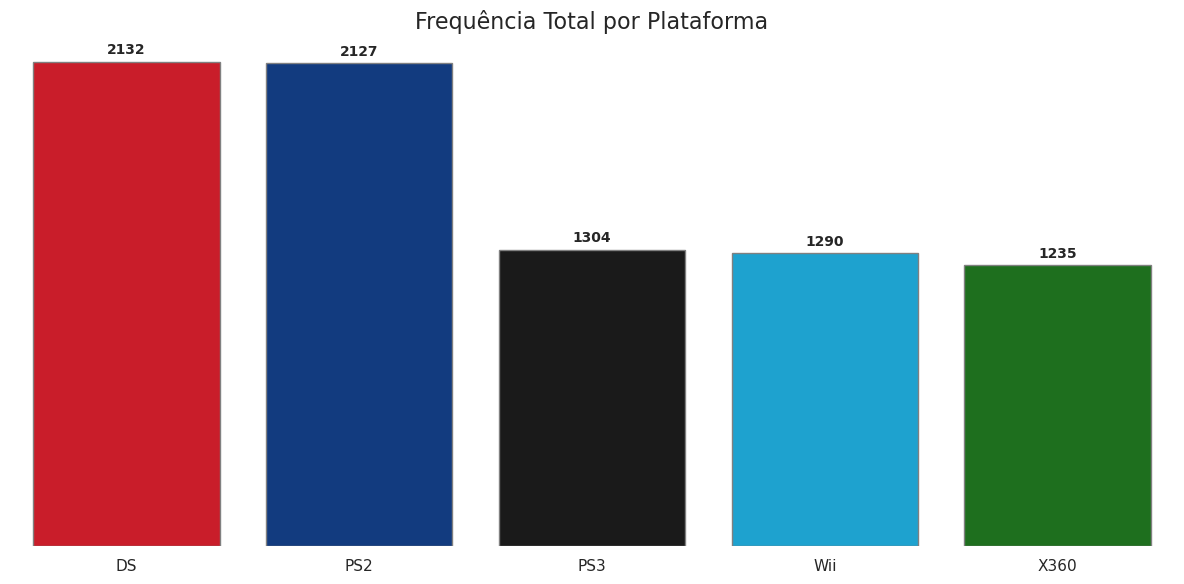

In [94]:
console_freq = pd.DataFrame({
    "frequency": df['platform'].value_counts(),
    "relative_frequency": df['platform'].value_counts(normalize=True) * 100
}
).sort_values(by=['frequency'], ascending=False).reset_index()

console_5 = console_freq[:5]

plt.figure(figsize=(12, 6))

color = ['#E60012', "#003791", '#1A1A1A', '#00B0ED', '#107C10']

ax = sns.barplot(data=console_5,
            x='platform',
            y='frequency',
            palette=color,
            hue='platform',
            edgecolor='gray',
            legend=False,
            )

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

sns.despine(left=True, bottom=True)

ax.set_ylabel('')
ax.set_xlabel('')

plt.title('Frequência Total por Plataforma', fontsize=16)

plt.yticks([])

plt.tight_layout()
plt.show()

In [95]:
console_5 = console_freq[:5]
console_5.head()

,platform,frequency,relative_frequency
0,DS,2132,13.061325
1,PS2,2127,13.030693
2,PS3,1304,7.988728
3,Wii,1290,7.902959
4,X360,1235,7.566011


In [96]:
fig = go.Figure(go.Barpolar(
    r=console_5['frequency'],
    theta=console_5['platform'],
    marker_color=console_5['frequency'],
    marker_line_color="black",
    marker_line_width=2,
    opacity=0.85
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            range=[0, console_5['frequency'].max() * 1.1]
        )
    ),
    width=500,
    height=500
)

fig.show()


In [97]:
freq_genres = pd.DataFrame({
    "frequency": df['genre'].value_counts(),
    "rel_frequency" : df['genre'].value_counts(normalize=True) * 100
}).sort_values(by='frequency', ascending=False).reset_index()

freq_genres.head(10)

,genre,frequency,rel_frequency
0,Action,3252,19.922808
1,Sports,2304,14.115052
2,Misc,1710,10.476015
3,Role-Playing,1469,8.999571
4,Shooter,1282,7.853948
5,Adventure,1276,7.817190
6,Racing,1226,7.510874
7,Platform,876,5.366661
8,Simulation,850,5.207376
9,Fighting,836,5.121608


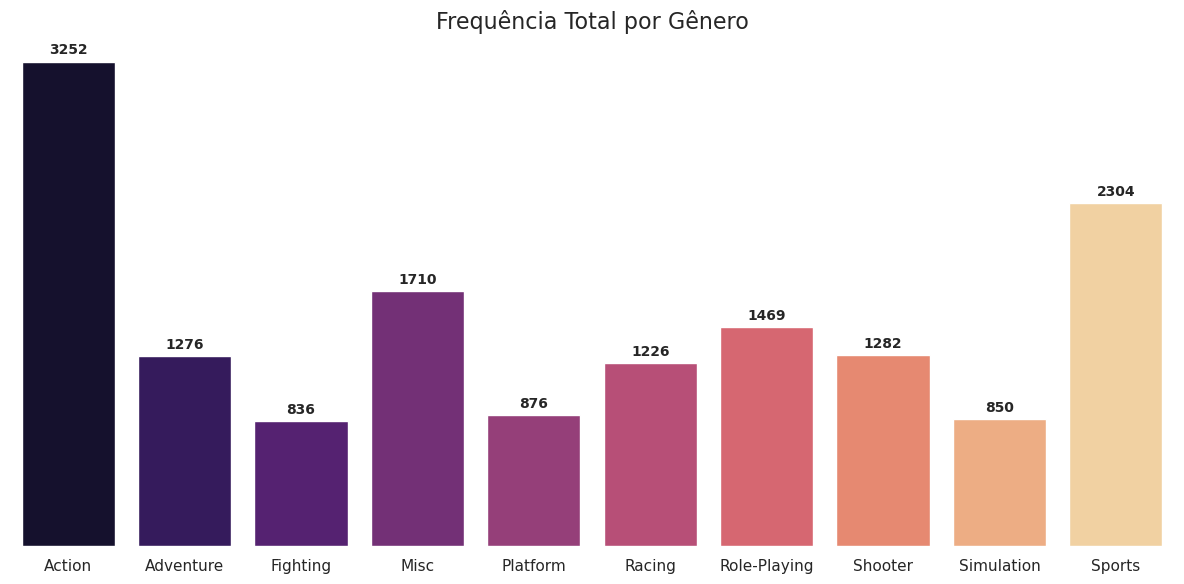

In [98]:
genres_top10 = freq_genres[:10].sort_values(by='genre')

plt.figure(figsize=(12, 6))

ax = sns.barplot(data=genres_top10,
            x='genre',
            y='frequency',
            palette='magma',
            hue='genre',
            legend=False,
            )

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

sns.despine(left=True, bottom=True)

ax.set_ylabel('')
ax.set_xlabel('')

plt.title('Frequência Total por Gênero', fontsize=16)

plt.yticks([])

plt.tight_layout()
plt.show()

In [99]:
publisher_freq = pd.DataFrame({
    "frequency": df['publisher'].value_counts(),
    "rel_frequency": df['publisher'].value_counts(normalize=True) * 100
}).sort_values(by='frequency', ascending=False).reset_index()

publisher_freq.head(10)

,publisher,frequency,rel_frequency
0,Electronic Arts,1339,8.221281
1,Activision,966,5.931111
2,Namco Bandai Games,928,5.697796
3,Ubisoft,917,5.630257
4,Konami Digital Entertainment,823,5.053110
5,THQ,712,4.371585
6,Nintendo,696,4.273347
7,Sony Computer Entertainment,682,4.187389
8,Sega,630,3.868116
9,Take-Two Interactive,412,2.529625


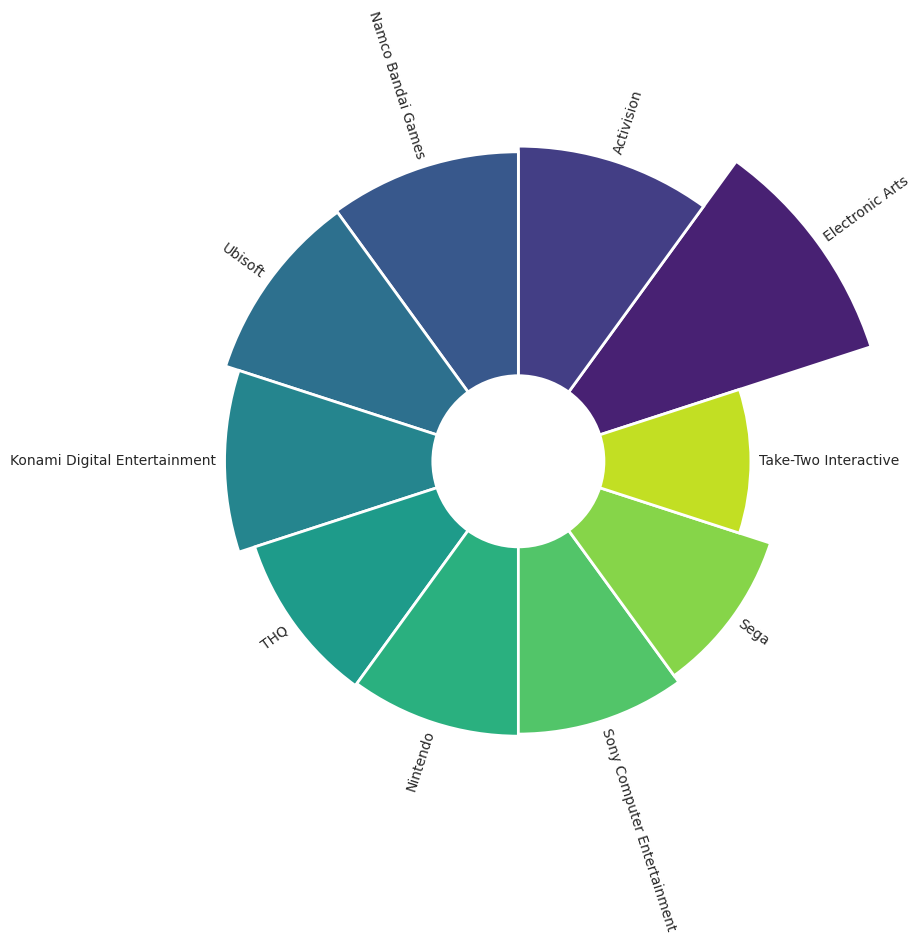

In [100]:

publisher_top10 = publisher_freq[:10]

max_val = publisher_top10['frequency'].max()

plt.figure(figsize=(10,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

upperLimit = 100
lowerLimit = 30

# Adjusting the heights calculation using the lower and upper limit
slope = (upperLimit - lowerLimit) / max_val
heights = slope * publisher_top10.frequency + lowerLimit

# width -> complete circle / number of publishers
width = 2*np.pi / len(publisher_top10.index)
indexes = list(range(1, len(publisher_top10.index)+1))
angles = [element * width for element in indexes]

bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=lowerLimit,
    linewidth=2,
    edgecolor="white",
    color=sns.color_palette("viridis", len(publisher_top10))
)

# Adding publisher names
for i, bar in enumerate(bars):
    angle_rad = angles[i]
    angle_deg = np.rad2deg(angle_rad)
    
    # If the text is in the bottom part (90-270 degrees), we spin 180° so the text doesn't get upside down
    if 90 < angle_deg < 270:
        rotation = angle_deg + 180
        alignment = "right"
    else:
        rotation = angle_deg
        alignment = "left"

    ax.text(
        x=angle_rad, 
        y=lowerLimit + heights[i] + 3,
        s=publisher_top10['publisher'].iloc[i], 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor",
        fontsize=10
    )

plt.show()

A análise das frequências das variáveis qualitativas indica maior concentração de títulos nas plataformas DS e PS2, padrão consistente com o pico de lançamentos observado no período entre 2008 e 2010. Em termos de gênero, observa-se predominância de títulos do gênero Ação, seguido por Esportes, ambos apresentando frequência significativamente superior em relação aos demais gêneros, o que sugere maior foco da indústria em categorias de apelo mais amplo. No que se refere às publishers, EA, Activision e Bandai Namco concentram o maior número de títulos lançados, indicando maior escala de produção.

## MEDIDAS DE TENDÊNCIA CENTRAL

### MÉDIA

In [101]:
sales_mean = pd.DataFrame({
    'region': ['global_sales', 'jp_sales', 'eu_sales', 'na_sales', 'other_sales'],
    'mean': [
        df['global_sales'].mean(),
        df['jp_sales'].mean(),
        df['eu_sales'].mean(),
        df['na_sales'].mean(),
        df['other_sales'].mean()
    ]
})

sales_mean

,region,mean
0,global_sales,0.540343
1,jp_sales,0.078677
2,eu_sales,0.147591
3,na_sales,0.265463
4,other_sales,0.048336


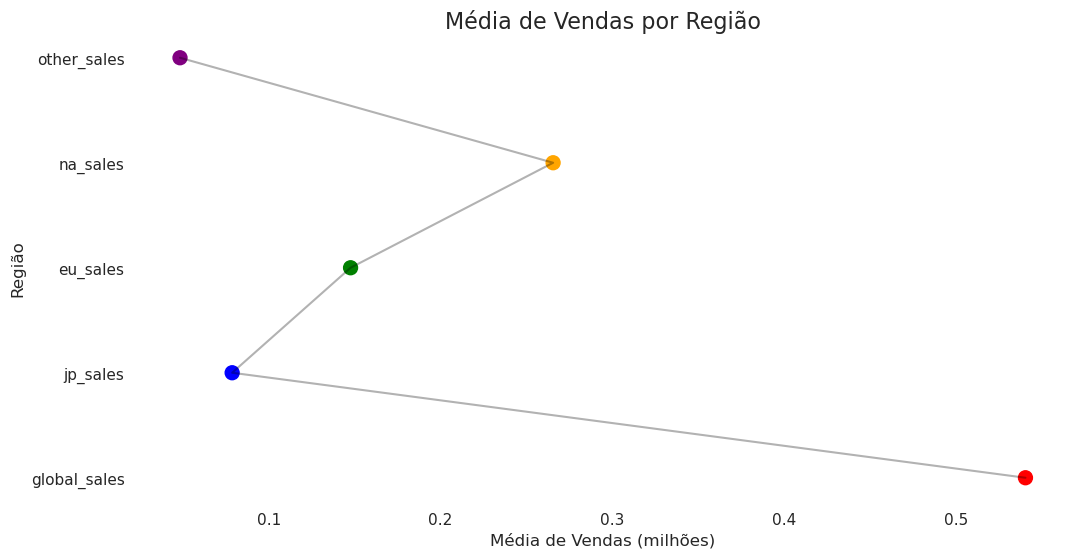

In [102]:
plt.figure(figsize=(12, 6))

sns.set_style('white')

colors = ['red', 'blue', 'green', 'orange', 'purple']

plt.scatter(sales_mean['mean'], sales_mean['region'], c=colors, s=100)
plt.plot(sales_mean['mean'], sales_mean['region'], color='black', alpha=0.3)

sns.despine(left=True, bottom=True)

plt.xlabel('Média de Vendas (milhões)')
plt.ylabel('Região')
plt.title('Média de Vendas por Região', fontsize=16)

plt.show()

### MEDIANA

In [103]:
sales_median = pd.DataFrame({
    'region': ['global_sales', 'jp_sales', 'eu_sales', 'na_sales', 'other_sales'],
  'median': [    
    df['global_sales'].median(),
    df['jp_sales'].median(),
    df['eu_sales'].median(),
    df['na_sales'].median(),
    df['other_sales'].median()]
}
)

sales_median

,region,median
0,global_sales,0.17
1,jp_sales,0.00
2,eu_sales,0.02
3,na_sales,0.08
4,other_sales,0.01


### MODA

In [104]:
sales_mode = pd.DataFrame({
  'mode': [    df['name'].mode(),
    df['platform'].mode(),
    df['genre'].mode(),
    df['publisher'].mode(),
    ]
}, index=['name', 'platform', 'genre', 'publisher'])

sales_mode

,mode
name,"0 Need for Speed: Most Wanted Name: name, d..."
platform,"0 DS Name: platform, dtype: object"
genre,"0 Action Name: genre, dtype: object"
publisher,"0 Electronic Arts Name: publisher, dtype: o..."


Em todas as regiões analisadas, a média apresenta valores substancialmente superiores à mediana, indicando distribuições fortemente assimétricas à direita. Observa-se que, em algumas regiões, como o Japão, a mediana de vendas é nula, o que reforça a elevada concentração de vendas em um número reduzido de títulos. Esse padrão sugere que a maioria dos jogos apresenta desempenho regional limitado, enquanto poucos títulos concentram volumes expressivos, comportamento consistente com os histogramas apresentados anteriormente. Cabe destacar que as vendas são medidas em milhões de unidades, o que pode levar a medianas nulas em regiões onde a maior parte dos títulos apresenta vendas inferiores a esse limiar.

## MEDIDAS DE DISPERSÃO

### DESVIO PADRÃO E VARIÂNCIA

In [105]:
sales = ['global_sales', 'jp_sales', 'eu_sales', 'na_sales', 'other_sales']
std = df[sales].std()

variance = df[sales].var()

print("Desvio Padrão:\n", std)

print("\nVariância:\n", variance)

Desvio Padrão:
 global_sales    1.565906
jp_sales        0.311593
eu_sales        0.508823
na_sales        0.821684
other_sales     0.189907
dtype: float64

Variância:
 global_sales    2.452063
jp_sales        0.097090
eu_sales        0.258901
na_sales        0.675164
other_sales     0.036065
dtype: float64


### VARIAÇÃO INTERQUARTIL

In [106]:

q3 = df[sales].quantile(0.75)
q1 = df[sales].quantile(0.25)
iqr = q3 - q1

print("Quartiles:\n", df[sales].quantile([0.25, 0.5, 0.75]))
print(f'\nIQR:\n{iqr}')

# Verifying data that is below Q1 - 1.5 * IQR or above Q3 + 1.5*IQR (outliers)

bottom_limit = q1 - (1.5 * iqr)
top_limit = q3 + (1.5 * iqr)

outliers = ((df[sales] < bottom_limit) | (df[sales] > top_limit))
df_outliers = df[outliers.any(axis=1)]
outlier_count = outliers.sum()

print(f"\nTotal de registros com pelo menos um outlier: {len(df_outliers)}\n")
print(f"Quantidade de outlier por coluna:\n{outlier_count}")

Quartiles:
       global_sales  jp_sales  eu_sales  na_sales  other_sales
0.25          0.06      0.00      0.00      0.00         0.00
0.50          0.17      0.00      0.02      0.08         0.01
0.75          0.48      0.04      0.11      0.24         0.04

IQR:
global_sales    0.42
jp_sales        0.04
eu_sales        0.11
na_sales        0.24
other_sales     0.04
dtype: float64

Total de registros com pelo menos um outlier: 4526

Quantidade de outlier por coluna:
global_sales    1827
jp_sales        2407
eu_sales        2054
na_sales        1660
other_sales     1645
dtype: int64


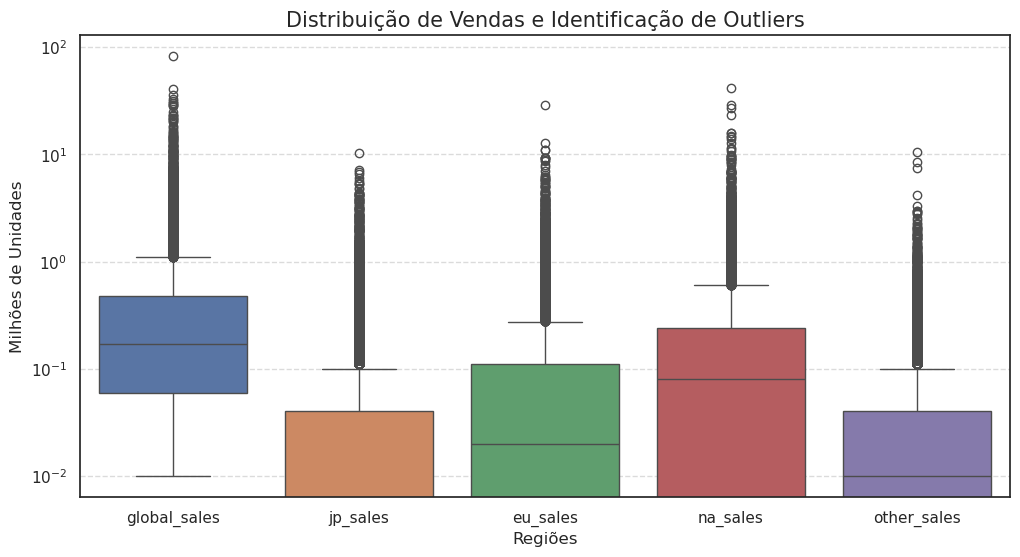

In [107]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=df[sales])

plt.title('Distribuição de Vendas e Identificação de Outliers', fontsize=15)
plt.ylabel('Milhões de Unidades')
plt.xlabel('Regiões')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yscale('log')

plt.show()

Em todas as regiões analisadas, a **variância**, o **desvio padrão** e o **boxplot** indicam distribuições fortemente assimétricas à direita. Os valores elevados de **desvio padrão** e **variância**, sobretudo nas vendas globais e na América do Norte, revelam alta dispersão, com poucos títulos concentrando volumes expressivos de vendas.

O boxplot reforça esse padrão ao apresentar medianas próximas dos valores mínimos e grande quantidade de **outliers superiores**, evidenciando que a maioria dos jogos possui vendas reduzidas. Em regiões como Japão e Outras, os baixos valores de variância e desvio padrão estão associados a caixas menores e maior **homogeneidade**, embora com níveis de vendas mais baixos.

De forma geral, os resultados confirmam um mercado altamente concentrado, no qual poucos sucessos dominam as vendas, enquanto a maioria dos títulos apresenta desempenho limitado.

# ANÁLISE EXPLORATÓRIA
Nesta etapa, exploraremos os dados sob uma **perspectiva global** para compreender a evolução da indústria de games ao longo das décadas e identificar as características fundamentais que dominam o mercado, tanto global quanto regionalmente.

Iniciaremos com uma **análise visual da trajetória da indústria** de 1980 a 2016, observando como o volume de lançamentos e vendas se comportou em resposta às mudanças tecnológicas e ao comportamento do consumidor.

## Vendas ao longo dos anos

In [108]:

df_anim = df.groupby('year')['global_sales'].sum().reset_index()
df_anim = df_anim.sort_values('year')

fig, ax = plt.subplots(figsize=(12, 6))

def update(i):
    ax.clear() 
    
    data = df_anim.iloc[:i+1]

    current_year = int(data['year'].iloc[-1])
    current_sales = data['global_sales'].iloc[-1]
    

    # Main lineplot
    ax.plot(data['year'], data['global_sales'], color='#007acc', linewidth=3, alpha=0.8)

    # Filling the area below the lineplot
    ax.fill_between(data['year'], data['global_sales'], color='#007acc', alpha=0.2)
    
    # Scatter plot that follows the line
    ax.scatter(current_year, current_sales, color='#007acc', s=100, edgecolors='white', zorder=5)
    
    ax.set_title(f'Vendas Globais até o Ano: {int(df_anim.iloc[i]["year"])}', fontsize=16)
    ax.set_ylabel('Vendas (Milhões)')
    ax.set_ylim(0, df_anim['global_sales'].max() * 1.1)
    ax.set_xlim(df_anim['year'].min() - 1, df_anim['year'].max() + 1)


ani = FuncAnimation(fig, update, frames=len(df_anim), interval=200, repeat=False)

plt.close()

HTML(ani.to_jshtml())

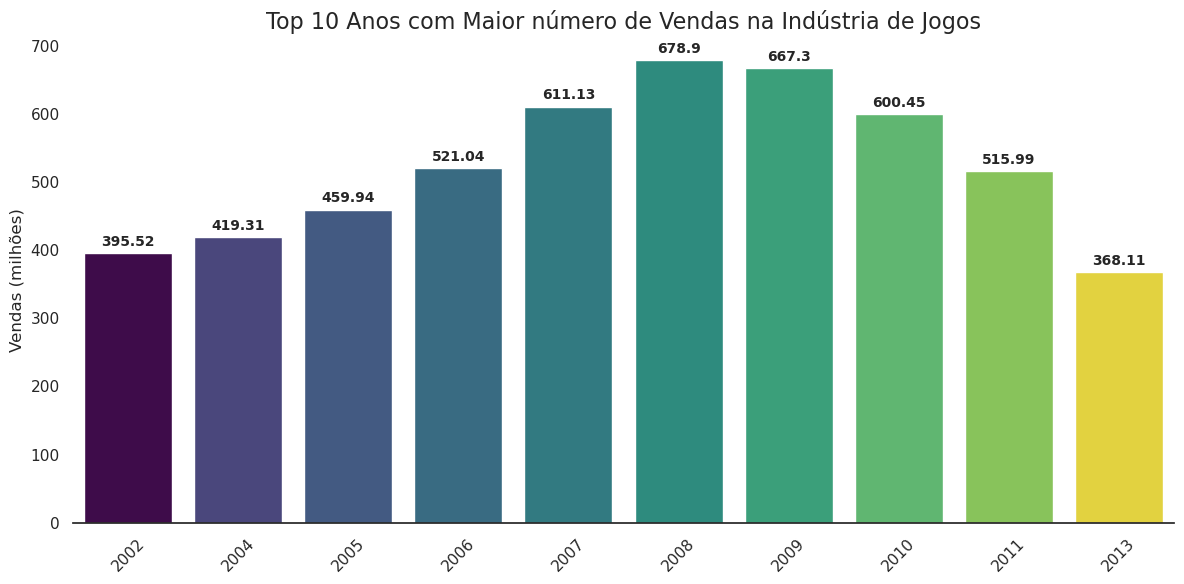

In [109]:
sales_10 = df_anim.nlargest(10, 'global_sales')
sales_10['year'] = sales_10['year'].astype(int)

plt.figure(figsize=(12, 6))

sns.set_theme(style="white")

ax = sns.barplot(data=sales_10,
            x='year',
            y='global_sales',
            palette='viridis',
            hue='year',
            legend=False
            )

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

sns.despine(left=True)

ax.set_ylabel('Vendas (milhões)')
ax.set_xlabel('')

plt.title('Top 10 Anos com Maior número de Vendas na Indústria de Jogos', fontsize=16)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Jogos mais vendidos

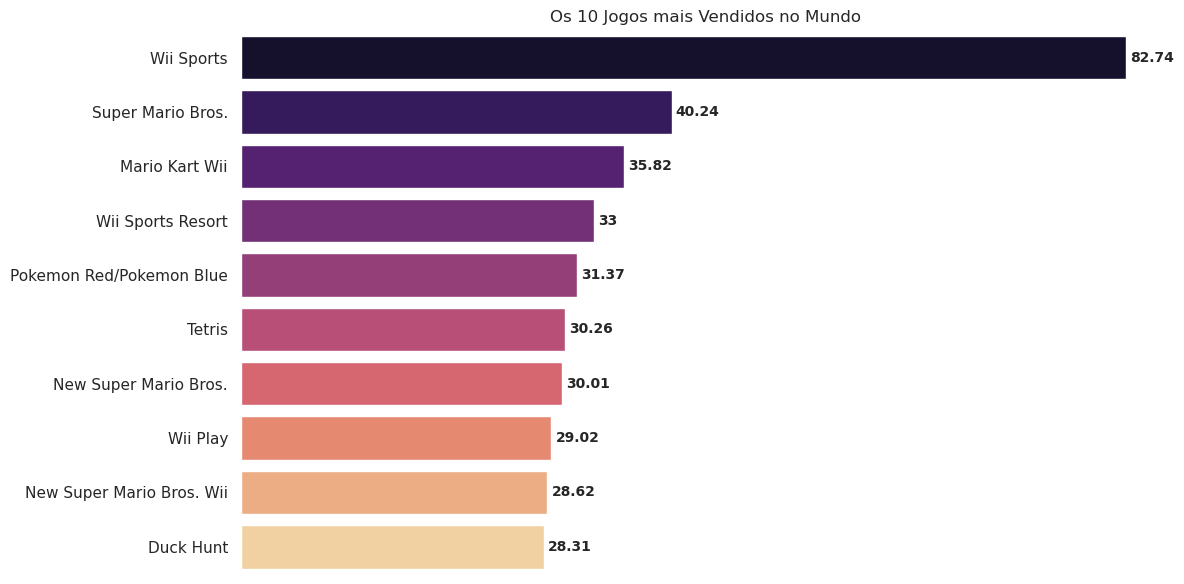

In [110]:

plt.figure(figsize=(12, 6))

top10_global = df.nlargest(10, 'global_sales')
sns.set_style(style="white")

ax = sns.barplot(data=top10_global, 
                 x='global_sales', 
                 y='name', 
                 palette='magma',
                 hue='name')

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

plt.title("Os 10 Jogos mais Vendidos no Mundo")

sns.despine(left=True, bottom=True)
ax.set_ylabel('')
ax.set_xlabel('')
plt.xticks([])

plt.tight_layout()
plt.show()


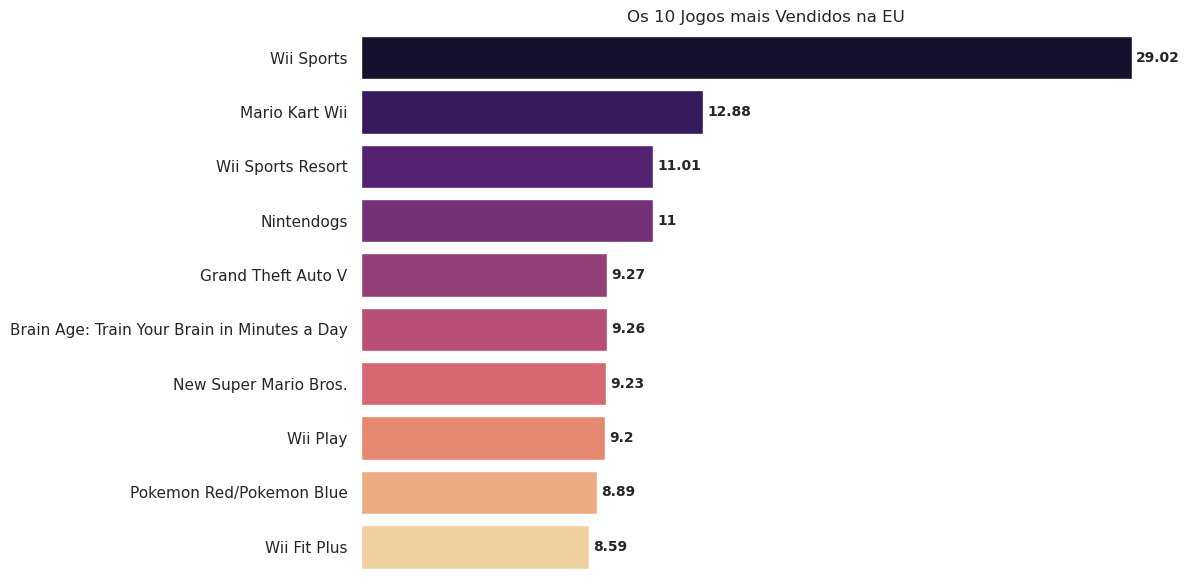

In [111]:
plt.figure(figsize=(12, 6))

top10_eu = df.nlargest(10, 'eu_sales')

sns.set_style(style="white")

ax = sns.barplot(data=top10_eu, 
                 x='eu_sales', 
                 y='name', 
                 palette='magma',
                 hue='name')

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

plt.title("Os 10 Jogos mais Vendidos na EU")

sns.despine(left=True, bottom=True)
ax.set_ylabel('')
ax.set_xlabel('')
plt.xticks([])

plt.tight_layout()
plt.show()


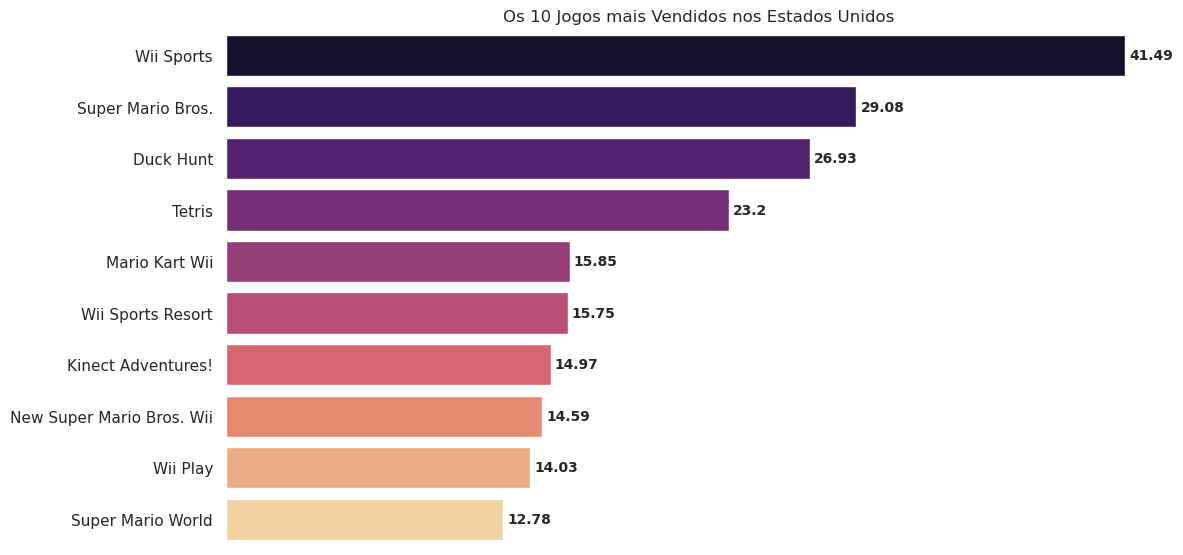

In [112]:
plt.figure(figsize=(12, 6))

top10_na = df.nlargest(10, 'na_sales')

sns.set_style(style="white")

ax = sns.barplot(data=top10_na, 
                 x='na_sales', 
                 y='name', 
                 palette='magma',
                 hue='name')

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

plt.title("Os 10 Jogos mais Vendidos nos Estados Unidos")

sns.despine(left=True, bottom=True)
ax.set_ylabel('')
ax.set_xlabel('')
plt.tight_layout()
plt.xticks([])

plt.show()


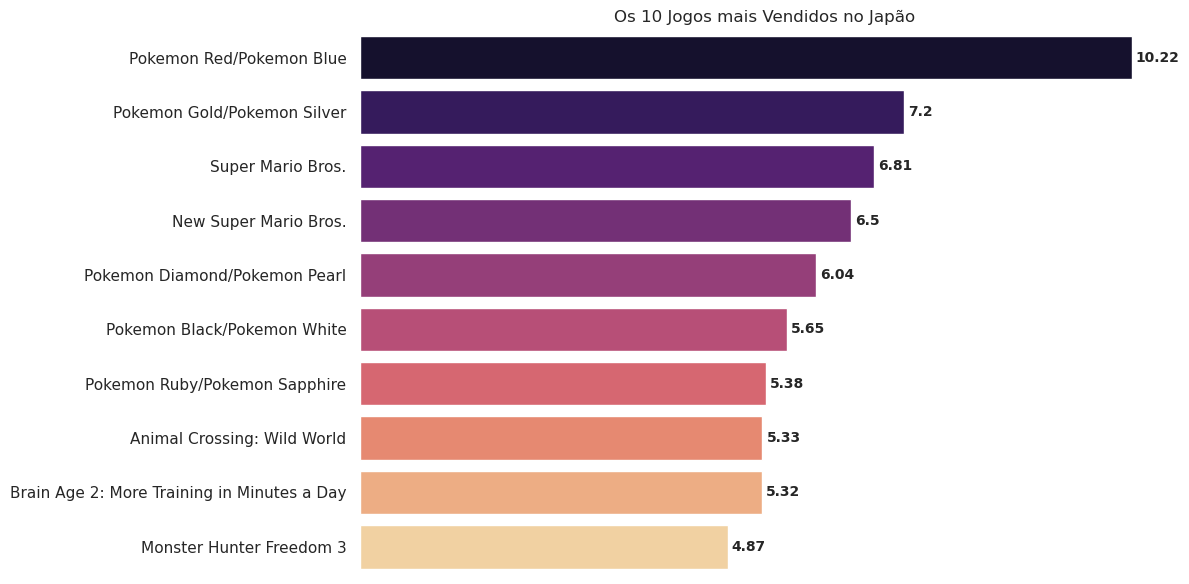

In [113]:
plt.figure(figsize=(12, 6))

top10_jp = df.nlargest(10, 'jp_sales')

sns.set_style(style="white")

ax = sns.barplot(data=top10_jp, 
                 x='jp_sales', 
                 y='name', 
                 palette='magma',
                 hue='name')

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

plt.title("Os 10 Jogos mais Vendidos no Japão")

sns.despine(left=True, bottom=True)
ax.set_ylabel('')
ax.set_xlabel('')
plt.xticks([])

plt.tight_layout()
plt.show()


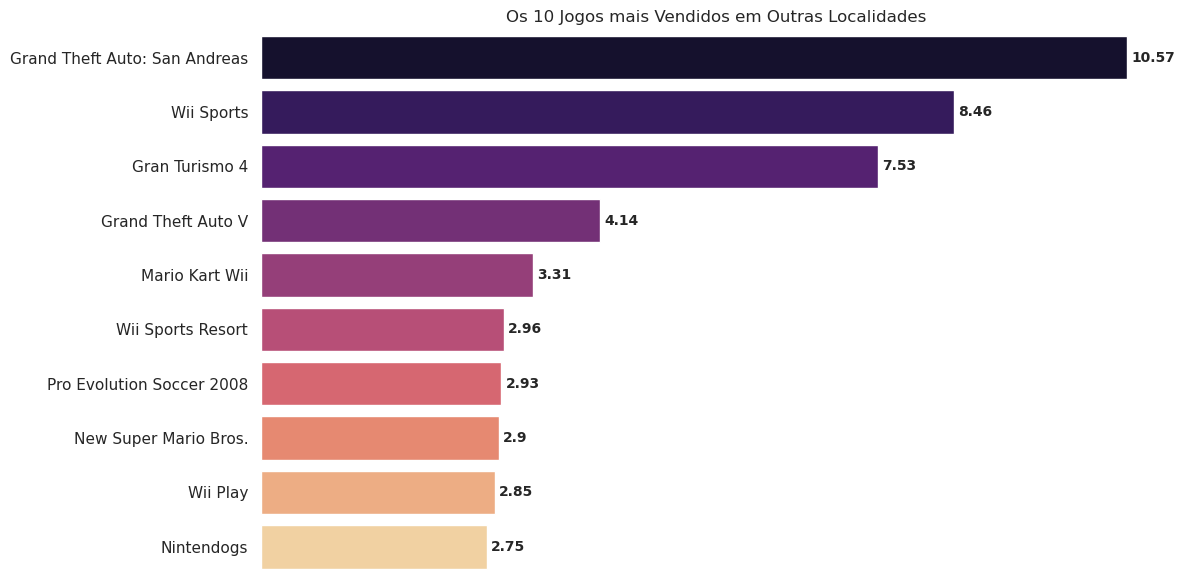

In [114]:
plt.figure(figsize=(12, 6))

top10_other = df.nlargest(10, 'other_sales')

sns.set_style(style="white")

ax = sns.barplot(data=top10_other, 
                 x='other_sales', 
                 y='name', 
                 palette='magma',
                 hue='name')

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

plt.title("Os 10 Jogos mais Vendidos em Outras Localidades")

sns.despine(left=True, bottom=True)
ax.set_ylabel('')
ax.set_xlabel('')
plt.xticks([])

plt.tight_layout()


plt.show()


## Plataformas com Maior Número de Vendas

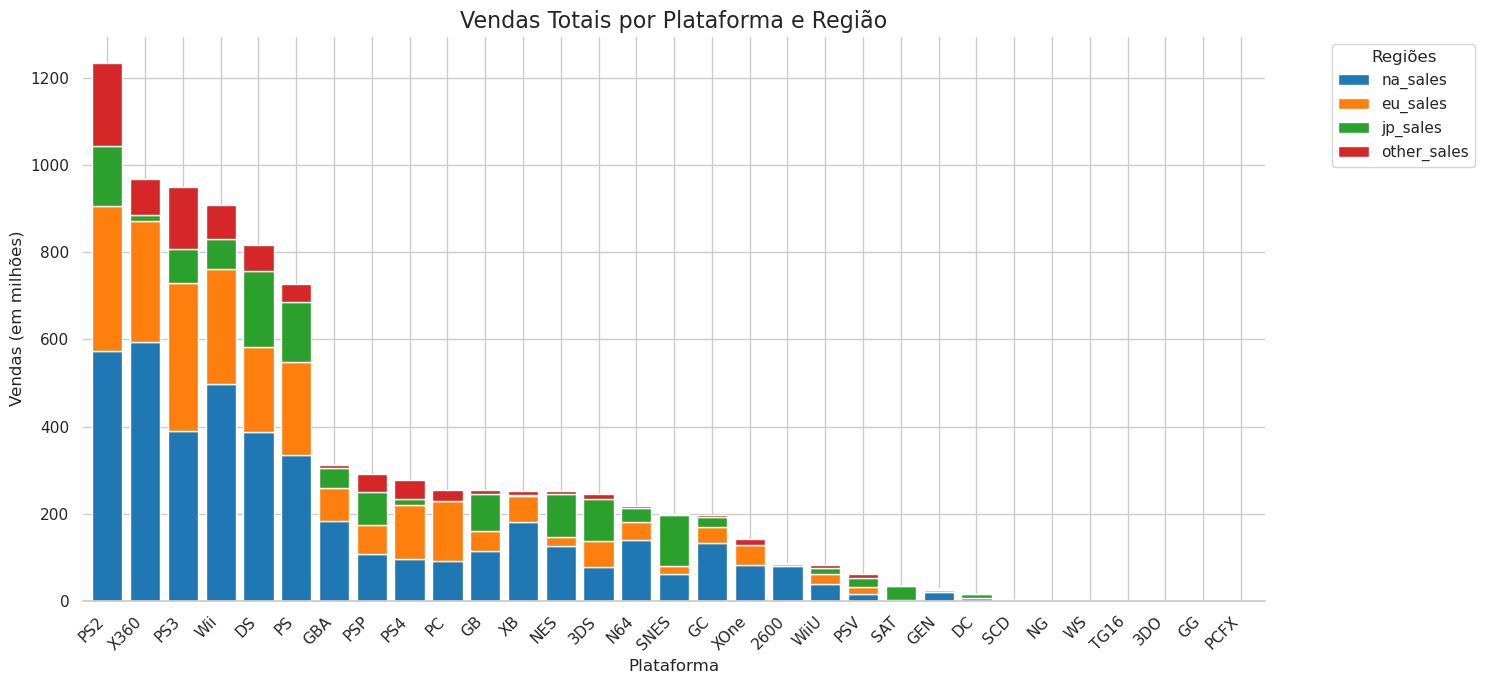

In [115]:
grouped_sales = df.groupby('platform')[['na_sales', 'global_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
grouped_sales = grouped_sales.sort_values('global_sales', ascending=False)
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

sns.set_theme(style='whitegrid')
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

ax = grouped_sales[regions].plot(kind='bar', 
                                 stacked=True, 
                                 figsize=(15, 7), 
                                 width=0.8,
                                 color=custom_colors,
                                 edgecolor='white')

plt.xticks(rotation=45, ha='right', fontsize=11)
plt.title('Vendas Totais por Plataforma e Região', fontsize=16)
plt.ylabel('Vendas (em milhões)')
plt.xlabel('Plataforma', fontsize=12)
plt.legend(title='Regiões', bbox_to_anchor=(1.05, 1), loc='upper left')

sns.despine(left=True)

plt.tight_layout()
plt.show()



## Vendas por Gênero

In [116]:

genre_na = df.groupby('genre')['na_sales'].sum().reset_index()

fig = px.treemap(
    genre_na,
    path=['genre'],
    values='na_sales',
    color='na_sales',
    color_continuous_scale='viridis',
    title='Vendas por Gênero na América do Norte'
)

fig.update_traces()
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

In [117]:

genre_eu = df.groupby('genre')['eu_sales'].sum().reset_index()

fig = px.treemap(
    genre_eu,
    path=['genre'],
    values='eu_sales',
    color='eu_sales',
    color_continuous_scale='viridis',
    title='Vendas por Gênero na Europa'
)

fig.update_traces()
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

In [118]:
genre_jp = df.groupby('genre')['jp_sales'].sum().reset_index()

fig = px.treemap(
    genre_jp,
    path=['genre'],
    values='jp_sales',
    color='jp_sales',
    color_continuous_scale='viridis',
    title='Vendas por Gênero no Japão'
)

fig.update_traces()
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

In [119]:
genre_other = df.groupby('genre')['other_sales'].sum().reset_index()

fig = px.treemap(
    genre_other,
    path=['genre'],
    values='other_sales',
    color='other_sales',
    color_continuous_scale='viridis',
    title='Vendas por Gênero em Outras Localidades'
)

fig.update_traces()
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

In [120]:
genre_global = df.groupby('genre')['global_sales'].sum().reset_index()

fig = px.treemap(
    genre_global,
    path=['genre'],
    values='global_sales',
    color='global_sales',
    color_continuous_scale='viridis',
    title='Vendas por Gênero Globais'
)

fig.update_traces()
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

## Publisher

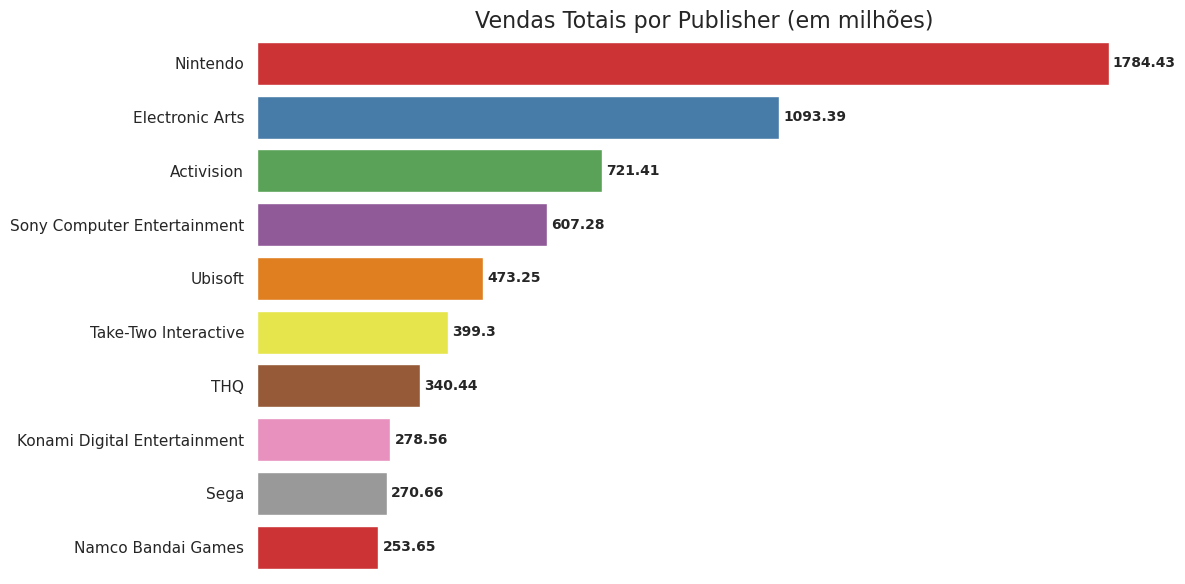

In [121]:
publisher_sales = df.groupby('publisher')['global_sales'].sum().reset_index()
publisher_sales_10 = publisher_sales.nlargest(10, 'global_sales')

plt.figure(figsize=(12, 6))

sns.set_theme(style="white")

ax = sns.barplot(data=publisher_sales_10,
            x='global_sales',
            y='publisher',
            palette='Set1',
            hue='publisher',
            legend=False,
            )

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

sns.despine(left=True, bottom=True)

ax.set_ylabel('')
ax.set_xlabel('')

plt.title('Vendas Totais por Publisher (em milhões)', fontsize=16)

plt.xticks([])

plt.tight_layout()
plt.show()

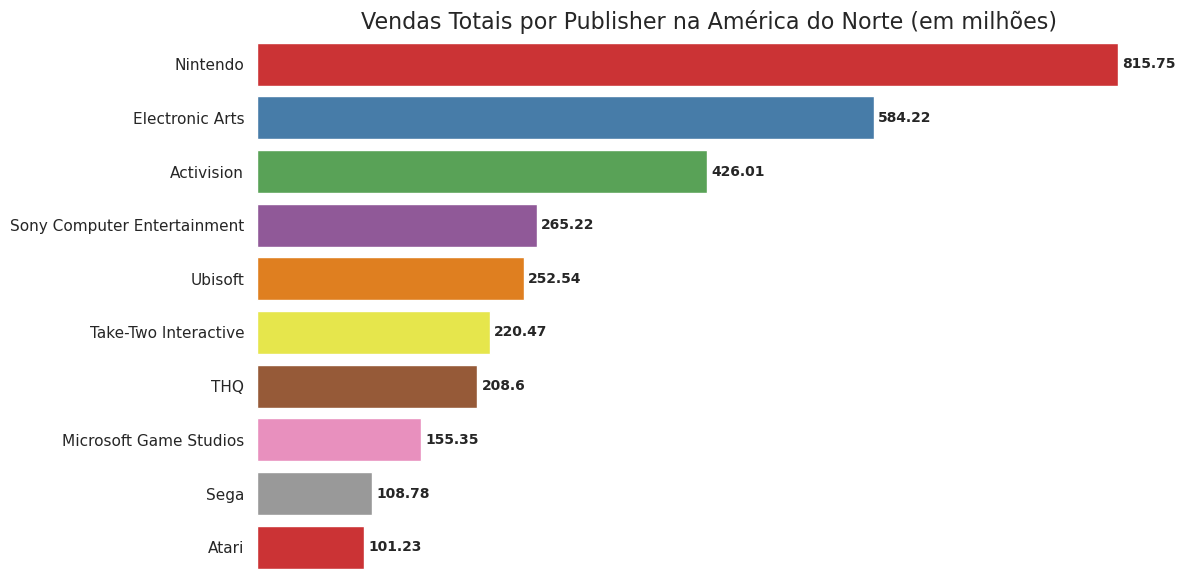

In [122]:

p_sales_na = df.groupby('publisher')['na_sales'].sum().reset_index()
p_sales_10_na = p_sales_na.nlargest(10, 'na_sales')

plt.figure(figsize=(12, 6))

sns.set_theme(style="white")

ax = sns.barplot(data=p_sales_10_na,
            x='na_sales',
            y='publisher',
            palette='Set1',
            hue='publisher',
            legend=False,
            )

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

sns.despine(left=True, bottom=True)

ax.set_ylabel('')
ax.set_xlabel('')

plt.title('Vendas Totais por Publisher na América do Norte (em milhões)', fontsize=16)

plt.xticks([])

plt.tight_layout()
plt.show()

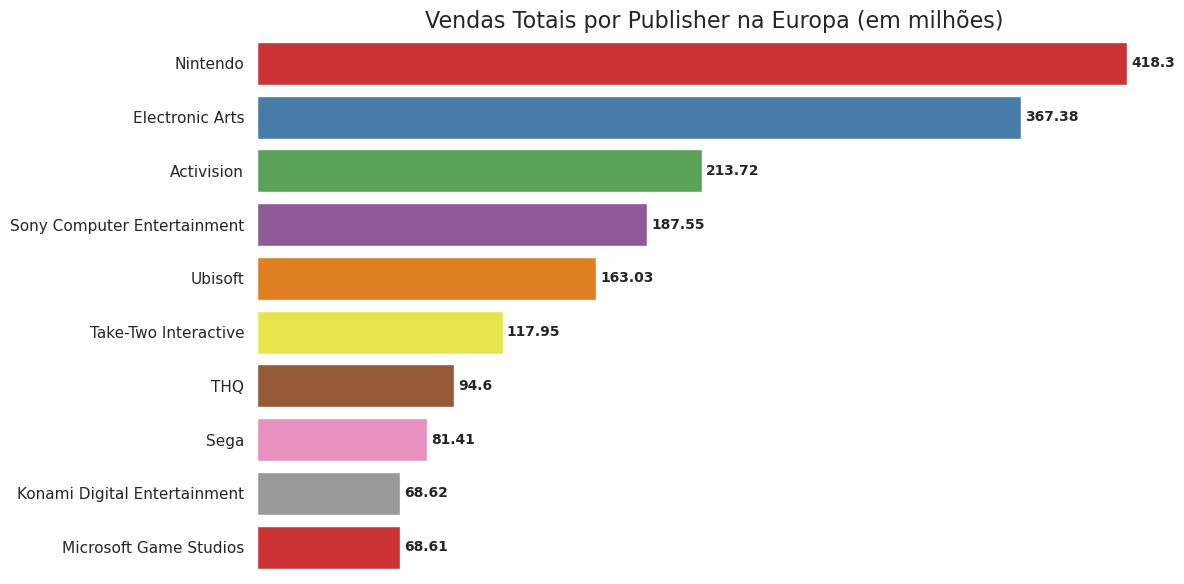

In [123]:

p_sales_eu = df.groupby('publisher')['eu_sales'].sum().reset_index()
p_sales_10_eu = p_sales_eu.nlargest(10, 'eu_sales')

plt.figure(figsize=(12, 6))

sns.set_theme(style="white")

ax = sns.barplot(data=p_sales_10_eu,
            x='eu_sales',
            y='publisher',
            palette='Set1',
            hue='publisher',
            legend=False,
            )

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

sns.despine(left=True, bottom=True)

ax.set_ylabel('')
ax.set_xlabel('')

plt.title('Vendas Totais por Publisher na Europa (em milhões)', fontsize=16)

plt.xticks([])

plt.tight_layout()
plt.show()

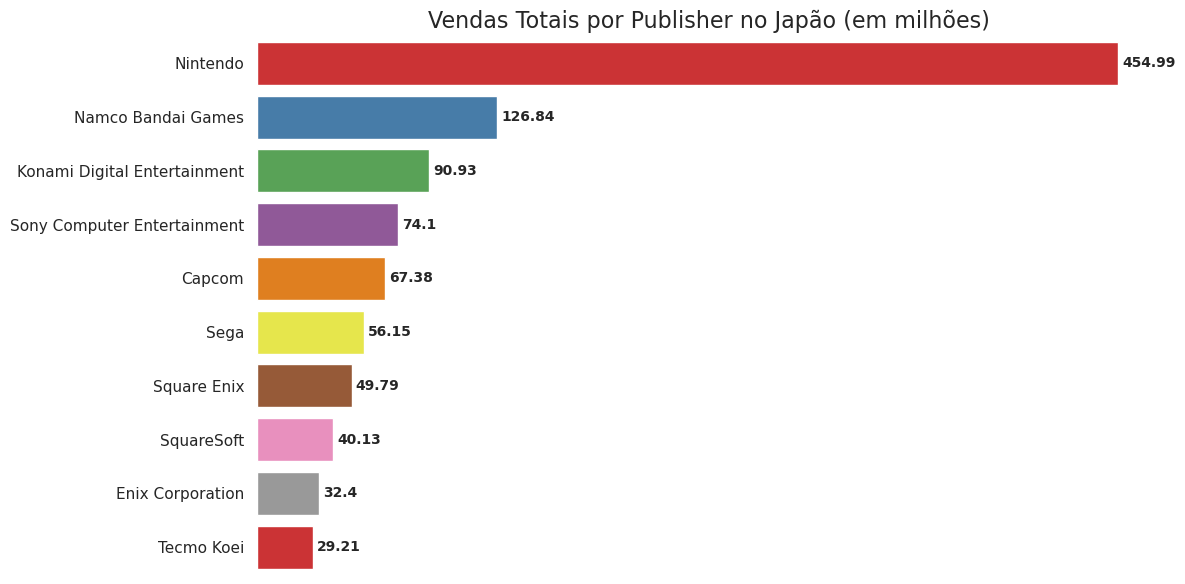

In [124]:
p_sales_jp = df.groupby('publisher')['jp_sales'].sum().reset_index()
p_sales_10_jp = p_sales_jp.nlargest(10, 'jp_sales')

plt.figure(figsize=(12, 6))

sns.set_theme(style="white")

ax = sns.barplot(data=p_sales_10_jp,
            x='jp_sales',
            y='publisher',
            palette='Set1',
            hue='publisher',
            legend=False,
            )

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

sns.despine(left=True, bottom=True)

ax.set_ylabel('')
ax.set_xlabel('')

plt.title('Vendas Totais por Publisher no Japão (em milhões)', fontsize=16)

plt.xticks([])

plt.tight_layout()
plt.show()

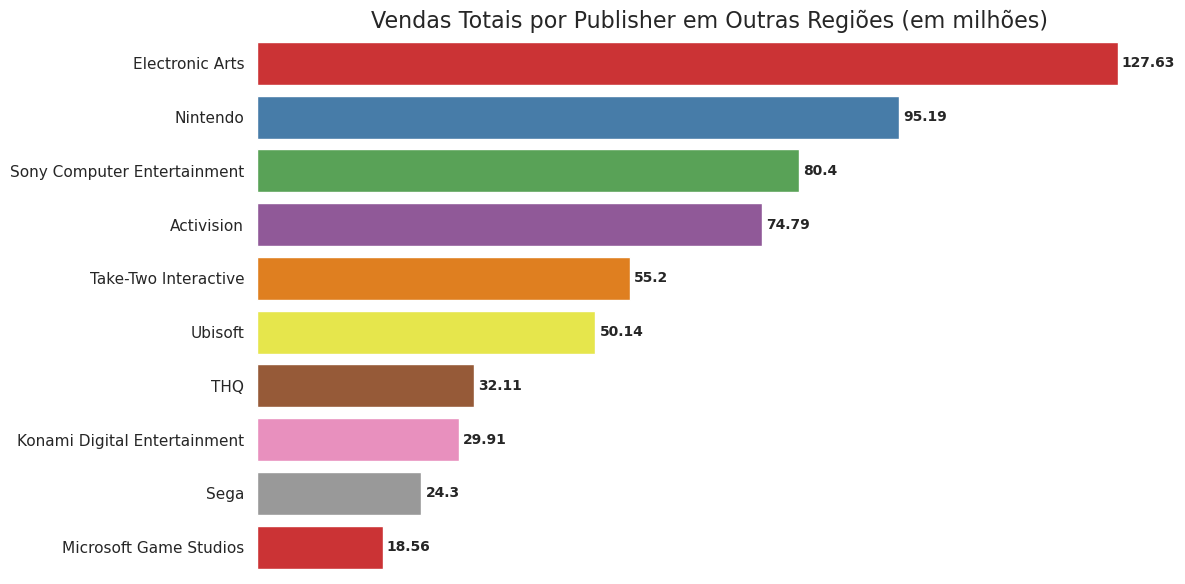

In [125]:
p_sales_other = df.groupby('publisher')['other_sales'].sum().reset_index()
p_sales_10_other = p_sales_other.nlargest(10, 'other_sales')

plt.figure(figsize=(12, 6))

sns.set_theme(style="white")

ax = sns.barplot(data=p_sales_10_other,
            x='other_sales',
            y='publisher',
            palette='Set1',
            hue='publisher',
            legend=False,
            )

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

sns.despine(left=True, bottom=True)

ax.set_ylabel('')
ax.set_xlabel('')

plt.title('Vendas Totais por Publisher em Outras Regiões (em milhões)', fontsize=16)

plt.xticks([])

plt.tight_layout()
plt.show()

# Observações Principais e Análises Orientadas para o Mercado
Nesta seção, buscaremos responder a perguntas estratégicas fundamentais para a compreensão do setor. A análise deixará de ser puramente descritiva para focar em dois pilares principais:
1. **Particularidades Regionais**

Realizaremos uma imersão em mercados específicos para identificar padrões de consumo locais. Esta abordagem permite explorar como as preferências de gêneros e plataformas variam geograficamente, revelando oportunidades e desafios únicos em cada região.

2. **Eficiência de Vendas e Rentabilidade**

Até o momento, analisamos o faturamento total e o volume de títulos de forma isolada. Agora, cruzaremos essas métricas para calcular a **eficiência de vendas**. O objetivo é ir além do faturamento bruto e identificar quais estratégias e plataformas entregam a melhor média de vendas por lançamento, oferecendo uma perspectiva mais precisa sobre a performance e a relevância das grandes empresas no mercado.

## 1. Como a preferência por gêneros evoluiu em cada região nos últimos anos?

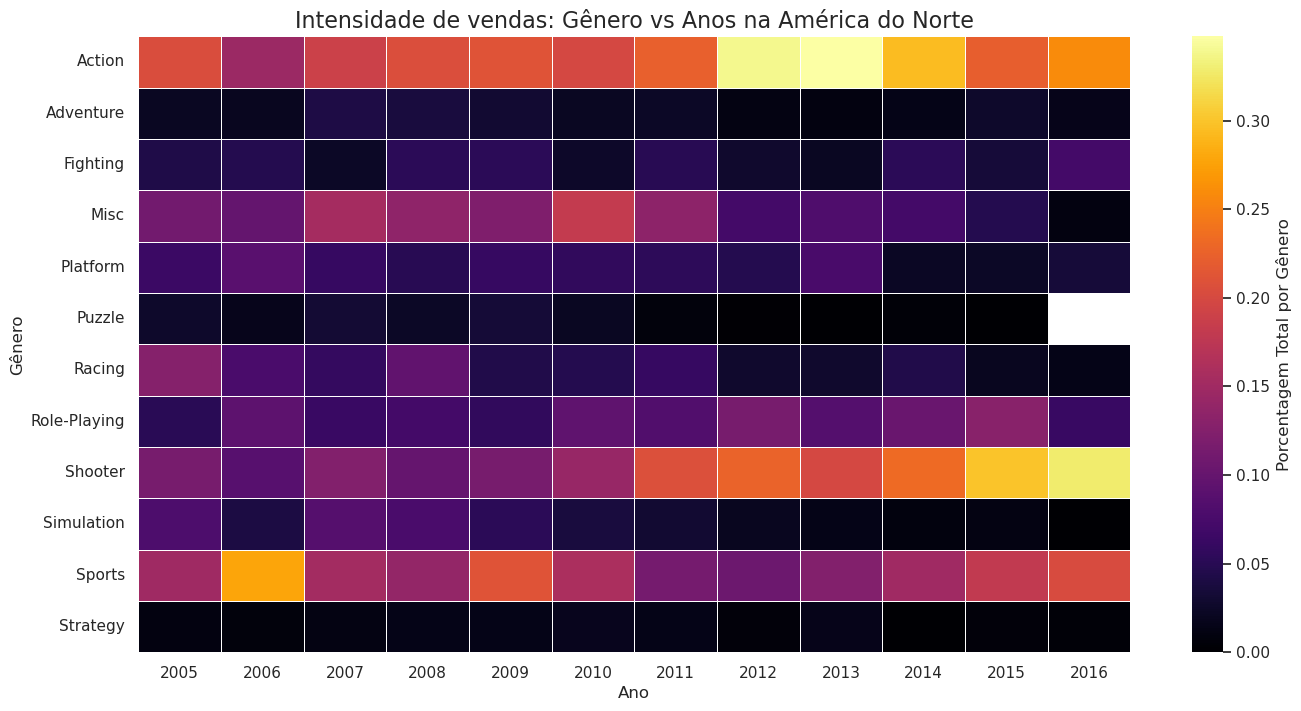

In [126]:
df_heatmap = df.groupby(['year', 'genre'])['na_sales'].sum().reset_index()
df_heatmap = df_heatmap[df_heatmap['year'] >= 2005 ]
df_heatmap['year'] = df_heatmap['year'].astype(int)

heatmap_data = df_heatmap.pivot(index='genre', columns='year', values='na_sales')
heatmap_norm = heatmap_data.div(heatmap_data.sum(axis=0), axis=1)

plt.figure(figsize=(16, 8))

sns.heatmap(heatmap_norm,
            cmap='inferno',
            annot=False,
            linewidth=0.5,
            cbar_kws={'label': 'Porcentagem Total por Gênero'})

plt.title('Intensidade de vendas: Gênero vs Anos na América do Norte', fontsize=16)
plt.xlabel('Ano')
plt.ylabel('Gênero')
plt.show()


No mercado norte-americano, os gêneros Ação e Esportes mantêm posição dominante ao longo do período analisado, indicando categorias consolidadas e de baixo risco comercial. A partir de 2011, observa-se crescimento consistente do gênero Shooter, que atinge maior relevância por volta de 2016, sinalizando uma mudança no mix de portfólio em direção a títulos com maior apelo competitivo e potencial de engajamento recorrente. Em contrapartida, os gêneros Corrida e Simulação apresentam retração ao longo do tempo, sugerindo redução de atratividade relativa. O gênero Role-Playing mantém estabilidade, indicando demanda fiel, porém com menor potencial de expansão.

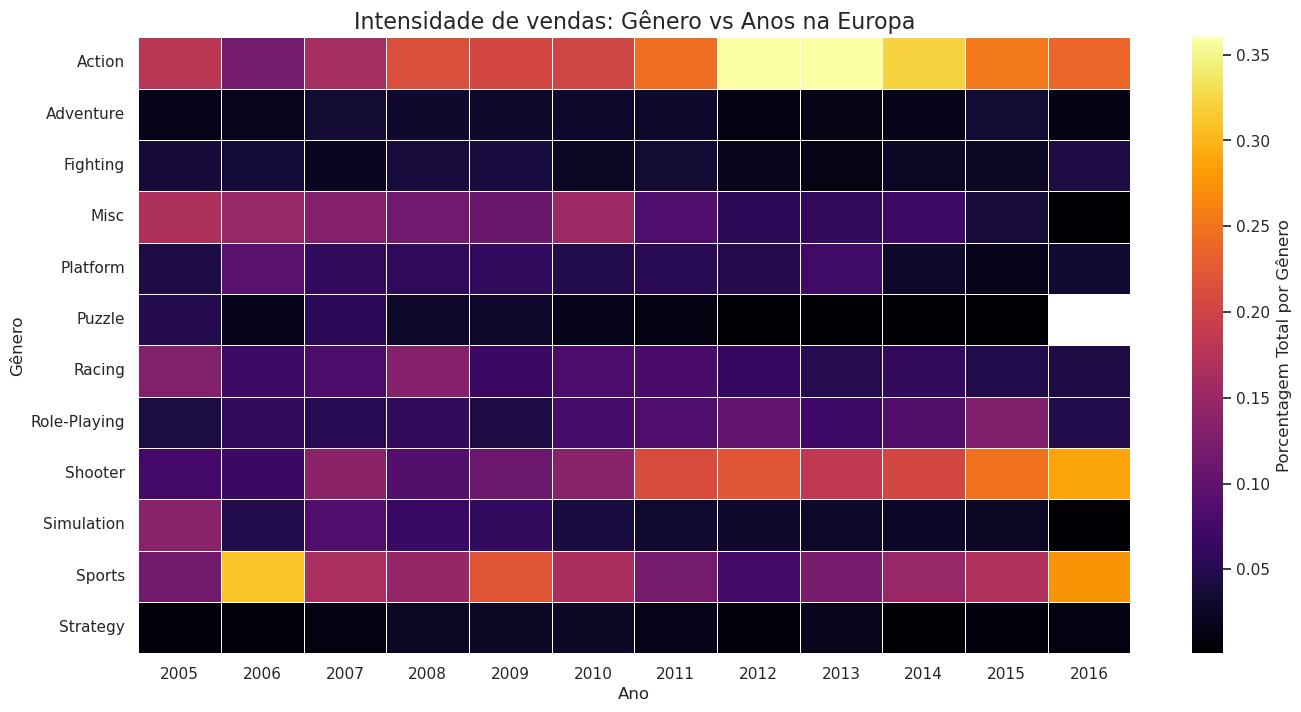

In [127]:
df_heatmap = df.groupby(['year', 'genre'])['eu_sales'].sum().reset_index()
df_heatmap = df_heatmap[df_heatmap['year'] >= 2005 ]
df_heatmap['year'] = df_heatmap['year'].astype(int)

heatmap_data = df_heatmap.pivot(index='genre', columns='year', values='eu_sales')
heatmap_norm = heatmap_data.div(heatmap_data.sum(axis=0), axis=1)

plt.figure(figsize=(16, 8))

sns.heatmap(heatmap_norm,
            cmap='inferno',
            annot=False,
            linewidth=0.5,
            cbar_kws={'label': 'Porcentagem Total por Gênero'})

plt.title('Intensidade de vendas: Gênero vs Anos na Europa', fontsize=16)
plt.xlabel('Ano')
plt.ylabel('Gênero')
plt.show()


No mercado europeu, observa-se um padrão semelhante ao norte-americano, com a manutenção da dominância dos gêneros Ação e Esportes ao longo do período analisado. O gênero Shooter apresenta trajetória de crescimento comparável à observada nos Estados Unidos, indicando consolidação desse segmento no mercado Europeu. O gênero Corrida, por sua vez, demonstra comportamento relativamente estável ao longo do tempo, sugerindo uma base de demanda consistente e menor volatilidade.

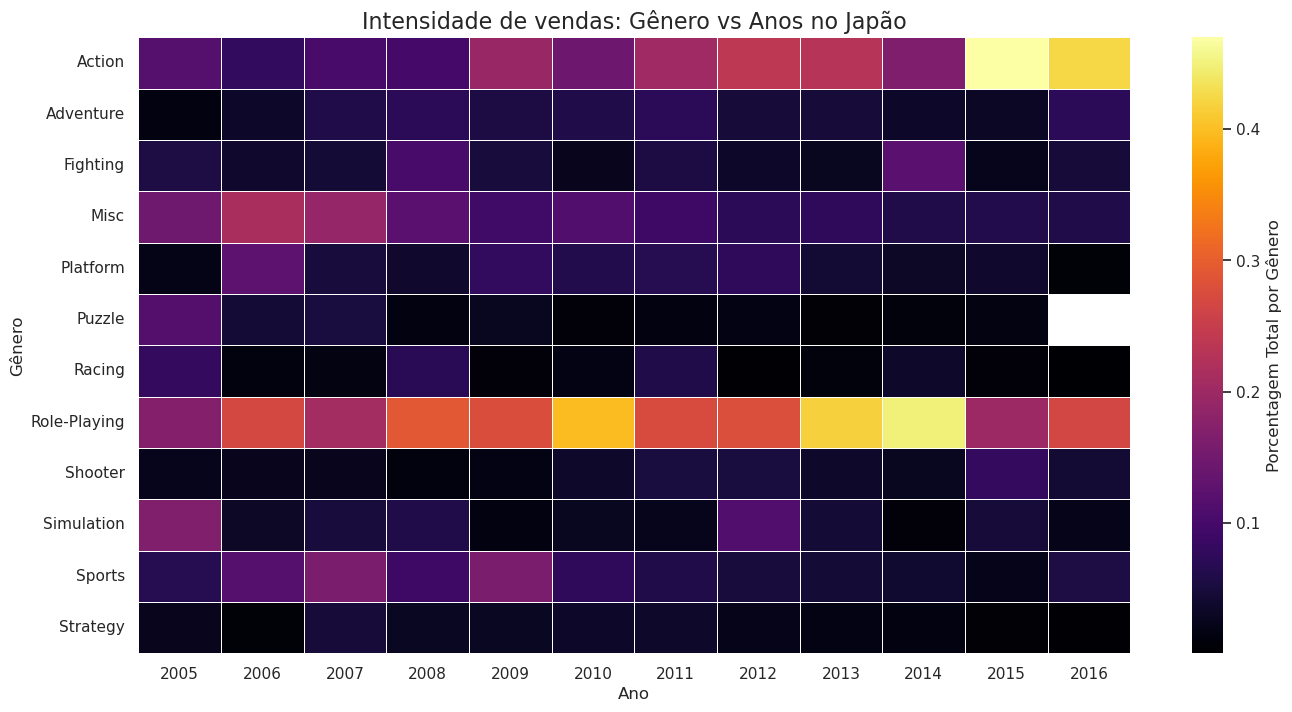

In [128]:
df_heatmap = df.groupby(['year', 'genre'])['jp_sales'].sum().reset_index()
df_heatmap = df_heatmap[df_heatmap['year'] >= 2005 ]
df_heatmap['year'] = df_heatmap['year'].astype(int)

heatmap_data = df_heatmap.pivot(index='genre', columns='year', values='jp_sales')
heatmap_norm = heatmap_data.div(heatmap_data.sum(axis=0), axis=1)

plt.figure(figsize=(16, 8))

sns.heatmap(heatmap_norm,
            cmap='inferno',
            annot=False,
            linewidth=0.5,
            cbar_kws={'label': 'Porcentagem Total por Gênero'})

plt.title('Intensidade de vendas: Gênero vs Anos no Japão', fontsize=16)
plt.xlabel('Ano')
plt.ylabel('Gênero')
plt.show()


No mercado japonês, observa-se um padrão distinto em relação às demais regiões analisadas. O gênero Role-Playing apresenta dominância consistente ao longo do período, indicando forte preferência estrutural por esse segmento. Embora o gênero Ação já seja consolidado, nota-se uma ascensão mais recente, sugerindo ampliação gradual do seu espaço no portfólio regional. Em contraste com os mercados ocidentais, o gênero Esportes apresenta menor relevância relativa, e não se observa a ascensão do gênero Shooter verificada na América do Norte e na Europa. Os demais gêneros mantêm participação relativamente estável ao longo do período, reforçando um mercado com preferências mais bem definidas.

## 2. Análise de Eficiência Histórica: Quais plataformas geraram maior valor médio por título lançado?

In [129]:
# Agrupando por plataforma
df_eff = df.groupby('platform').agg(
    total_sales=('global_sales', 'sum'),
    num_games=('name', 'count')
).reset_index()

# Métrica eficiência (média)
df_eff['sales_per_game'] = df_eff['total_sales'] / df_eff['num_games']

#Utilziando apenas plataformas com mais de 100 jogos
df_eff = df_eff[df_eff['num_games'] >= 100].sort_values('total_sales', ascending=False)

df_eff

,platform,total_sales,num_games,sales_per_game
16,PS2,1233.46,2127,0.579906
28,X360,969.61,1235,0.785109
17,PS3,949.35,1304,0.728029
26,Wii,909.81,1290,0.705279
4,DS,818.67,2132,0.383992
15,PS,727.39,1189,0.611766
6,GBA,313.56,811,0.386634
19,PSP,291.71,1197,0.243701
18,PS4,278.07,335,0.830060
13,PC,255.05,943,0.270467


In [130]:
df_eff.sort_values(by='num_games', ascending=False)

,platform,total_sales,num_games,sales_per_game
4,DS,818.67,2132,0.383992
16,PS2,1233.46,2127,0.579906
17,PS3,949.35,1304,0.728029
26,Wii,909.81,1290,0.705279
28,X360,969.61,1235,0.785109
19,PSP,291.71,1197,0.243701
15,PS,727.39,1189,0.611766
13,PC,255.05,943,0.270467
6,GBA,313.56,811,0.386634
29,XB,252.09,803,0.313935


In [131]:
df_eff.sort_values(by='sales_per_game', ascending=False)

,platform,total_sales,num_games,sales_per_game
23,SNES,200.05,239,0.837029
18,PS4,278.07,335,0.830060
28,X360,969.61,1235,0.785109
0,2600,86.57,116,0.746293
17,PS3,949.35,1304,0.728029
26,Wii,909.81,1290,0.705279
10,N64,218.21,316,0.690538
30,XOne,141.06,213,0.662254
15,PS,727.39,1189,0.611766
16,PS2,1233.46,2127,0.579906


/tmp/ipykernel_647/705081014.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




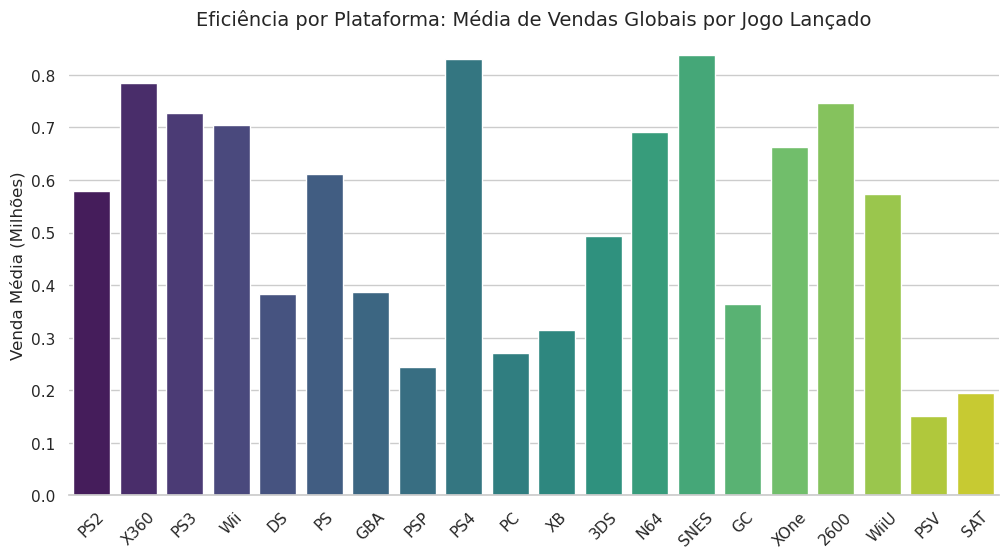

In [132]:
sns.set_theme(style='whitegrid')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_eff, x='platform', y='sales_per_game', palette='viridis')
plt.title('Eficiência por Plataforma: Média de Vendas Globais por Jogo Lançado', fontsize=14)
plt.ylabel('Venda Média (Milhões)')
plt.xlabel('')
plt.xticks(rotation=45)
sns.despine(left=True)

plt.show()

A análise da eficiência histórica, definida como o volume de vendas globais por título lançado em cada plataforma, revela que maior volume de lançamentos não implica, necessariamente, maior retorno médio. Plataformas como SNES, PS4 e Xbox 360 apresentam os maiores níveis de eficiência média por título, indicando que catálogos mais enxutos ou melhor curados tendem a concentrar maior valor por lançamento.

Em contraste, plataformas com elevado número de títulos, como Nintendo DS e PlayStation 2, apesar de liderarem em volume de lançamentos, apresentam eficiência média relativamente inferior, sugerindo diluição de retorno associada à alta densidade de oferta. Por outro lado, consoles como Xbox 360, PlayStation 3 e Wii demonstram maior equilíbrio entre escala e eficiência, indicando estratégias de portfólio mais otimizadas durante o período analisado.

Observa-se ainda um padrão consistente de menor eficiência média nas plataformas portáteis, incluindo DS, GBA, PSP, PS Vita e 3DS, independentemente do volume total de vendas ou do sucesso comercial da plataforma. Esse comportamento sugere características estruturais do segmento portátil que impactam negativamente o retorno médio por título. De forma semelhante, a plataforma PC, apesar de sua ampla base e diversidade de títulos, apresenta baixa eficiência média, refletindo elevada fragmentação da demanda e forte competição interna entre lançamentos.

De maneira geral, os resultados indicam que a eficiência média por título está mais associada à estratégia de portfólio e à densidade de lançamentos do que ao volume total de vendas de uma plataforma. Esses achados reforçam a importância de curadoria, posicionamento e segmentação na maximização de retorno médio em mercados altamente competitivos.